# Exploratory data analysis of the FIFA15 dataset

The Fifa 15 dataset from kaggle was cleaned and analyzed to view player stats distibution, club stats and sort out some of the best players in their specific position.

Features with more than 80% missing data were dropped.

Distibution of the overall rating and skills were visualized for each position and correlation between positions, skillsets, age and weight were analyzed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
fifa_15=pd.read_csv(r'C:\Users\bryan\Downloads\datasets\fifa\players_15.csv')
pd.set_option('display.max_columns', None)
fifa_15.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,93,95,0,0,CF,Left,5,3,4,Medium/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CF,10.0,NaN,2004-07-01,2018.0,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",84,94-3,71,89,85-5,96-1,89+2,90+4,76,96,96,90+2,94,94-2,95,80-1,73,77-1,60,88,48,22,92-1,90,76,NaN,25,21,20,6,11,15,14,8,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,92,92,0,0,"LW, LM",Right,5,4,5,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2018.0,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",83,95+3,86,82,87+2,93+3,88,79,72,92-3,91,94,93,90,63-12,94,94,89,79,93,63,24,91+2,81,85,NaN,22,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,91+3,91+3,91+3,89+3,89+3,89+3,89+3,87+3,77+3,77+3,77+3,87+3,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,90,90,0,0,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",SUB,10.0,NaN,2009-08-28,2017.0,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85+2,50,86+2,86+2,93,85,83-1,76+3,90+1,93,93+2,93+1,89+2,91,86,61,78+11,65,90+1,47+9,39+1,89+2,84+2,80+1,NaN,29,26+2,26+1,10,8,11,5,15,84+3,84+3,84+3,88+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,78+3,78+3,78+3,87+3,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,90,90,0,0,ST,Right,5,4,4,Medium/Low,Normal,Yes,NaN,"#Poacher, #Aerial Threat, #Distance Shooter, #...",ST,10.0,NaN,2012-07-01,2016.0,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Leadership, Flair, Long Shot ...",76,91,76,84-2,92+3,88,80,80,76+4,90,74+2,77-1,86,85,41,93,72,78,93,88,84,20,86,83-1,91,NaN,25,41-8,27,13,15,10,9,12,87+3,87+3,87+3,84+3,86+3,86+3,86+3,84+3,86+3,86+3,86+3,83+3,76+3,76+3,76+3,83+3,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,90,90,0,0,GK,Right,5,4,1,Medium/Medi

In [3]:
fifa_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15465 entries, 0 to 15464
Columns: 104 entries, sofifa_id to rb
dtypes: float64(17), int64(11), object(76)
memory usage: 12.3+ MB


In [4]:
fifa_15.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,mentality_composure
count,15465.000000,15465.000000,15465.000000,15465.000000,15465.000000,15465.000000,15465.0,15465.0,15465.000000,15465.000000,15465.000000,0.0,15233.000000,15226.000000,1056.000000,13762.000000,13762.000000,13762.000000,13762.000000,13762.000000,13762.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,0.0
mean,189298.588425,24.763272,181.093631,75.482703,63.948594,68.483091,0.0,0.0,1.126350,2.932363,2.267055,NaN,19.803584,2016.959740,12.026515,68.088432,51.671777,55.744223,60.617861,50.000799,64.602456,64.709336,60.823840,59.455079,65.955373,43.900763,61.230182,NaN
std,39648.820272,4.624565,6.635182,6.907243,7.208610,6.611708,0.0,0.0,0.401362,0.652270,0.719035,NaN,16.547682,2.069059,6.661003,11.004400,13.443599,10.765868,10.800142,15.850317,9.698882,7.855747,8.510626,8.689929,8.374343,8.440858,9.188257,NaN
min,2.000000,16.000000,155.000000,50.000000,40.000000,40.000000,0.0,0.0,1.000000,1.000000,1.000000,NaN,1.000000,2014.000000,1.000000,22.000000,22.000000,24.000000,25.000000,21.000000,28.000000,35.000000,36.000000,21.000000,31.000000,20.000000,38.000000,NaN
25%,178043.000000,21.000000,176.000000,70.000000,59.000000,64.000000,0.0,0.0,1.000000,3.000000,2.000000,NaN,8.000000,2015.000000,6.000000,62.000000,41.000000,49.000000,54.000000,33.000000,58.000000,59.000000,55.000000,53.000000,60.000000,39.000000,54.000000,NaN
50%,200844.000000,24.000000,181.000000,75.000000,64.000000,68.000000,0.0,0.0,1.000000,3.000000,2.000000,NaN,17.000000,2016.000000,12.000000,69.000000,53.000000,57.000000,62.000000,53.000000,66.000000,64.000000,61.000000,59.000000,65.000000,44.000000,61.000000,NaN
75%,214326.000000,28.000000,186.000000,80.000000,69.000000,73.000000,0.0,0.0,1.000000,3.000000,3.000000,NaN,26.000000,2019.000000,18.000000,76.000000,62.000000,63.000000,68.000000,63.000000,72.000000,70.000000,67.000000,65.000000,72.000000,49.000000,68.000000,NaN
max,225562.000000,44.000000,203.000000,110.000000,93.000000,95.000000,0.0,0.0,5.000000,5.000000,5.000000,NaN,99.000000,2021.000000,28.000000,97.000000,93.000000,91.000000,96.000000,90.000000,91.000000,88.000000,87.000000,92.000000,90.000000,66.000000,90.000000,NaN


In [5]:
# Columns to drop
to_drop=['sofifa_id','player_url','dob','long_name',]
fifa_15=fifa_15.drop(to_drop,axis=1)
fifa_15.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,27,169,67,Argentina,FC Barcelona,93,95,0,0,CF,Left,5,3,4,Medium/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CF,10.0,NaN,2004-07-01,2018.0,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",84,94-3,71,89,85-5,96-1,89+2,90+4,76,96,96,90+2,94,94-2,95,80-1,73,77-1,60,88,48,22,92-1,90,76,NaN,25,21,20,6,11,15,14,8,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,Cristiano Ronaldo,29,185,80,Portugal,Real Madrid,92,92,0,0,"LW, LM",Right,5,4,5,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2018.0,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",83,95+3,86,82,87+2,93+3,88,79,72,92-3,91,94,93,90,63-12,94,94,89,79,93,63,24,91+2,81,85,NaN,22,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,91+3,91+3,91+3,89+3,89+3,89+3,89+3,87+3,77+3,77+3,77+3,87+3,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,A. Robben,30,180,80,Netherlands,FC Bayern München,90,90,0,0,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",SUB,10.0,NaN,2009-08-28,2017.0,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85+2,50,86+2,86+2,93,85,83-1,76+3,90+1,93,93+2,93+1,89+2,91,86,61,78+11,65,90+1,47+9,39+1,89+2,84+2,80+1,NaN,29,26+2,26+1,10,8,11,5,15,84+3,84+3,84+3,88+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,78+3,78+3,78+3,87+3,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,Z. Ibrahimović,32,195,95,Sweden,Paris Saint-Germain,90,90,0,0,ST,Right,5,4,4,Medium/Low,Normal,Yes,NaN,"#Poacher, #Aerial Threat, #Distance Shooter, #...",ST,10.0,NaN,2012-07-01,2016.0,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Leadership, Flair, Long Shot ...",76,91,76,84-2,92+3,88,80,80,76+4,90,74+2,77-1,86,85,41,93,72,78,93,88,84,20,86,83-1,91,NaN,25,41-8,27,13,15,10,9,12,87+3,87+3,87+3,84+3,86+3,86+3,86+3,84+3,86+3,86+3,86+3,83+3,76+3,76+3,76+3,83+3,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,M. Neuer,28,193,92,Germany,FC Bayern München,90,90,0,0,GK,Right,5,4,1,Medium/Medium,Normal,Yes,NaN,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,85.0,92.0,86.0,60.0,90.0,"GK Up for Corners, GK Long Throw, 1-on-1 Rush",25,25,25,42,25,25,25,25,41,31,58+8,61+7,43+4,89+3,35,42,78,44+9,83+5,25,29+3,30+8,25,20,37,NaN,25,25,25,87,85+3,92,90+6,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Player age distribution')

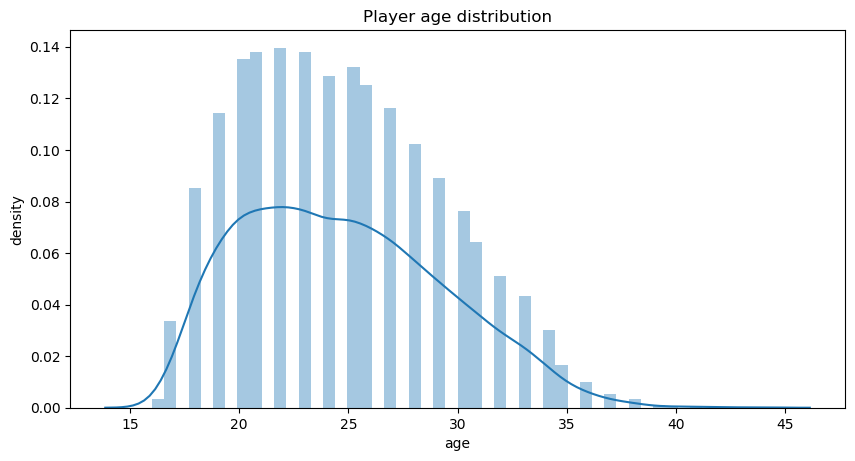

In [6]:
plt.figure(figsize=(10,5),dpi=100)
sns.distplot(fifa_15['age'])
plt.ylabel('density')
plt.title('Player age distribution')

Text(0.5, 1.0, 'Player weight distribution')

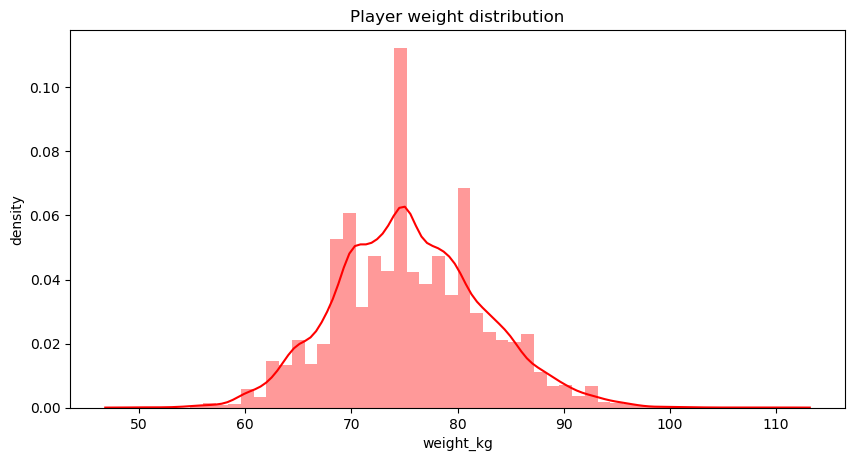

In [7]:
plt.figure(figsize=(10,5),dpi=100)
sns.distplot(fifa_15['weight_kg'],color='r')
plt.ylabel('density')
plt.title('Player weight distribution')

Text(0.5, 1.0, 'Player height distribution')

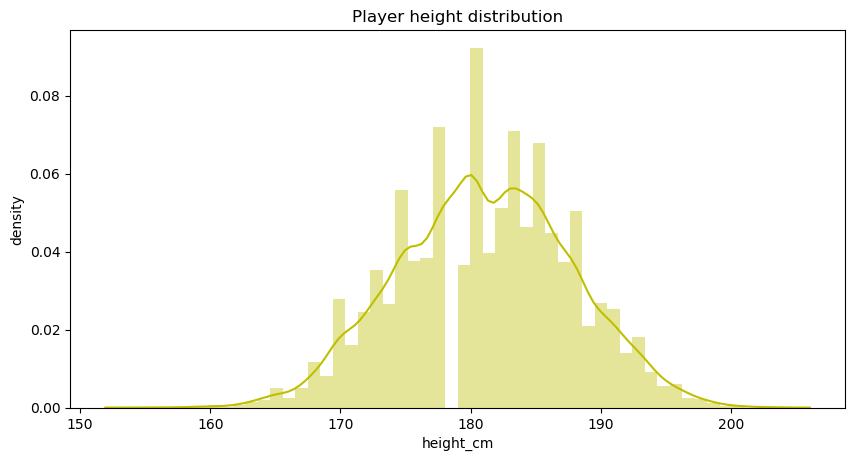

In [8]:
plt.figure(figsize=(10,5),dpi=100)
sns.distplot(fifa_15['height_cm'],color='y')
plt.ylabel('density')
plt.title('Player height distribution')

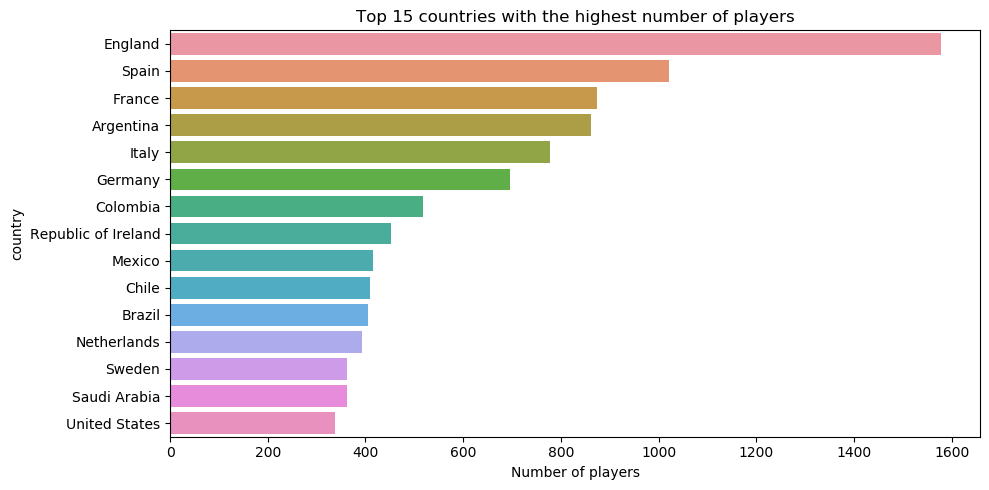

In [9]:
plt.figure(figsize=(10,5),dpi=100)
sns.barplot(x=fifa_15['nationality'].value_counts().head(15),y=fifa_15['nationality'].value_counts().head(15).index)
plt.xlabel('Number of players')
plt.ylabel('country')
plt.title('Top 15 countries with the highest number of players')
plt.tight_layout()

In [10]:
# Number of countries having more than 100 players 
sum(fifa_15['nationality'].value_counts()>100)

31

In [11]:
# Number of clubs represented in the dataset
fifa_15['club'].nunique()

596

Oldest players in the dataset

In [12]:
fifa_15[fifa_15['age']==fifa_15['age'].max()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3676,Kim Byung Ji,44,184,78,Korea Republic,Jeonnam Dragons,69,69,0,0,GK,Right,2,3,1,Medium/Medium,Normal,No,NaN,NaN,GK,1.0,NaN,2013-01-01,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,67.0,62.0,72.0,57.0,71.0,"GK Up for Corners, Team Player",25,25,25,23,25,25,25,25,22,30,64,52,67,59,61,22,77,25,57,25,31,26,25,20,24,NaN,25,25,25,69,67,62,71,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10504,A. Pierobon,44,183,79,Italy,Cittadella,61,61,0,0,GK,Right,1,1,1,Medium/Medium,Normal,No,NaN,NaN,SUB,1.0,NaN,2005-07-01,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0,54.0,59.0,24.0,64.0,"Leadership, Team Player",25,25,25,28-1,25,25,25,25,37-1,23-1,23,25,32,64-1,28,37-1,37,25,44,25,25,25,25,25,35-1,NaN,25,25,25,59-1,63-1,54-1,64-1,59-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15282,P. Mathers,44,183,72,Scotland,St. Mirren,49,49,0,0,GK,Right,1,2,1,Medium/Medium,Normal,No,NaN,NaN,RES,30.0,NaN,2014-03-31,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,52.0,45.0,45.0,32.0,51.0,NaN,20,25,25,23,25,25,25,25,22,20,30,34,35,52,42,21,48,27,48,25,25,21,25,25,23,NaN,25,25,25,50,52,45,51,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15455,B. Richardson,44,185,77,England,Wycombe Wanderers,43,43,0,0,GK,Right,1,2,1,Medium/Medium,Normal,No,NaN,NaN,SUB,13.0,NaN,2014-01-30,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,53.0,21.0,31.0,25.0,57.0,NaN,25,25,25,25,25,25,25,25,25,21,25,25,38,38,44,25,51,32,47,25,43-5,25,25,25-11,39,NaN,25,25,25,35,53,21,57,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Shortest  and tallest players

In [13]:
fifa_15[fifa_15['height_cm']==fifa_15['height_cm'].min()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
13517,A. Hamsal,27,155,50,Saudi Arabia,Najran SC,56,59,0,0,"RB, RM",Right,1,4,2,Medium/High,Lean,No,NaN,NaN,RM,29.0,NaN,2009-01-01,2020.0,NaN,NaN,71.0,54.0,57.0,62.0,48.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,47,45,56,45,59,38,38,54,56,69-2,72,81+1,64,95+13,65,46,71,22-6,62,65,55,49,63,52,NaN,38,52,51,10,7,9,12,8,54+0,54+0,54+0,61+0,58+0,58+0,58+0,61+0,59+0,59+0,59+0,61+0,58+0,58+0,58+0,61+0,57+0,54+0,54+0,54+0,57+0,56+0,48+0,48+0,48+0,56+0


In [14]:
fifa_15[fifa_15['height_cm']==fifa_15['height_cm'].max()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
409,L. Traoré,24,203,87,Ivory Coast,AS Monaco,78,84,0,0,ST,Left,2,3,3,High/Low,Lean,No,NaN,"#Aerial Threat, #Strength",SUB,19.0,NaN,2014-01-04,2018.0,NaN,NaN,77.0,79.0,51.0,67.0,36.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Selfish",34,80,81,60,69,73,39,35,33,71,75,79,41,75,31-34,78,54,73,90,79,54,40,81,72,79,NaN,25,34,25,9,9,9,14,13,78+0,78+0,78+0,65+0,76+0,76+0,76+0,65+0,71+0,71+0,71+0,63+0,62+0,62+0,62+0,63+0,50+0,54+0,54+0,54+0,50+0,50+0,50+0,50+0,50+0,50+0
1337,C. Pantilimon,27,203,96,Romania,Sunderland,74,75,0,0,GK,Right,1,2,1,Medium/Medium,Lean,Yes,NaN,NaN,SUB,1.0,NaN,2014-07-01,2018.0,SUB,1.0,NaN,NaN,NaN,NaN,NaN,NaN,75.0,72.0,67.0,77.0,45.0,76.0,"Avoids Using Weaker Foot, Puncher",25,25,25,37,25,25,25,25,35,24,48,42,33-19,68,22-33,25,34,45,78,25,39,26,25,25,40,NaN,25,25,25,75,72,67-6,76,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12969,A. Chapman,24,203,92,England,Chesterfield,57,62,0,0,GK,Right,1,2,1,Medium/Medium,Normal,No,NaN,NaN,SUB,20.0,NaN,2013-05-01,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,50.0,50.0,56.0,47.0,60.0,NaN,25,21-7,25,23,25,22,25,25,27,26,44,50,52,55,34,29,68,38,82,25,32,23,25,25,27,NaN,25,25,25,65,50+1,50,60+4,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Checking the values of the player wages and market value
print(fifa_15['value_eur'].sum())
print(fifa_15['wage_eur'].sum())

# since the values are zero, these 2 columns can be dropped

0
0


In [16]:
fifa_15.drop(['value_eur','wage_eur','release_clause_eur'],axis=1,inplace=True)
fifa_15.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,27,169,67,Argentina,FC Barcelona,93,95,CF,Left,5,3,4,Medium/Low,Normal,Yes,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CF,10.0,NaN,2004-07-01,2018.0,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",84,94-3,71,89,85-5,96-1,89+2,90+4,76,96,96,90+2,94,94-2,95,80-1,73,77-1,60,88,48,22,92-1,90,76,NaN,25,21,20,6,11,15,14,8,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,Cristiano Ronaldo,29,185,80,Portugal,Real Madrid,92,92,"LW, LM",Right,5,4,5,High/Low,Normal,Yes,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2018.0,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",83,95+3,86,82,87+2,93+3,88,79,72,92-3,91,94,93,90,63-12,94,94,89,79,93,63,24,91+2,81,85,NaN,22,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,91+3,91+3,91+3,89+3,89+3,89+3,89+3,87+3,77+3,77+3,77+3,87+3,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,A. Robben,30,180,80,Netherlands,FC Bayern München,90,90,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",SUB,10.0,NaN,2009-08-28,2017.0,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85+2,50,86+2,86+2,93,85,83-1,76+3,90+1,93,93+2,93+1,89+2,91,86,61,78+11,65,90+1,47+9,39+1,89+2,84+2,80+1,NaN,29,26+2,26+1,10,8,11,5,15,84+3,84+3,84+3,88+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,78+3,78+3,78+3,87+3,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,Z. Ibrahimović,32,195,95,Sweden,Paris Saint-Germain,90,90,ST,Right,5,4,4,Medium/Low,Normal,Yes,"#Poacher, #Aerial Threat, #Distance Shooter, #...",ST,10.0,NaN,2012-07-01,2016.0,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Leadership, Flair, Long Shot ...",76,91,76,84-2,92+3,88,80,80,76+4,90,74+2,77-1,86,85,41,93,72,78,93,88,84,20,86,83-1,91,NaN,25,41-8,27,13,15,10,9,12,87+3,87+3,87+3,84+3,86+3,86+3,86+3,84+3,86+3,86+3,86+3,83+3,76+3,76+3,76+3,83+3,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,M. Neuer,28,193,92,Germany,FC Bayern München,90,90,GK,Right,5,4,1,Medium/Medium,Normal,Yes,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,85.0,92.0,86.0,60.0,90.0,"GK Up for Corners, GK Long Throw, 1-on-1 Rush",25,25,25,42,25,25,25,25,41,31,58+8,61+7,43+4,89+3,35,42,78,44+9,83+5,25,29+3,30+8,25,20,37,NaN,25,25,25,87,85+3,92,90+6,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


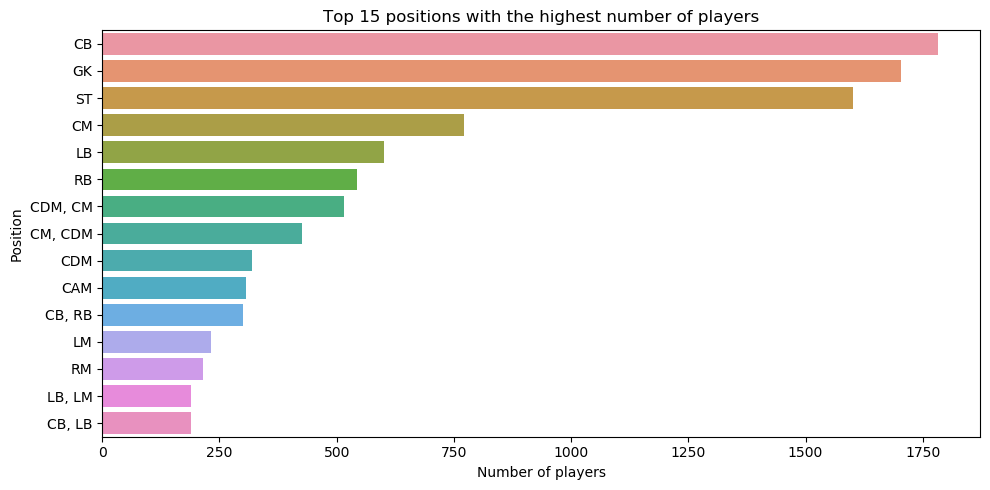

In [17]:
plt.figure(figsize=(10,5),dpi=100)
sns.barplot(x=fifa_15['player_positions'].value_counts().head(15),y=fifa_15['player_positions'].value_counts().head(15).index)
plt.xlabel('Number of players')
plt.ylabel('Position')
plt.title('Top 15 positions with the highest number of players')
plt.tight_layout()

*Dealing with missing data*

In [18]:
fifa_15['loaned_from']=fifa_15['loaned_from'].replace(np.nan,'None',inplace=True)

In [19]:
# Checking the percentage of missing data
print('missing data percentage:',len(fifa_15['gk_diving'].isnull())/len(fifa_15)*100)
print('missing data percentage:',len(fifa_15['gk_handling'].isnull())/len(fifa_15)*100)
print('missing data percentage:',len(fifa_15['gk_kicking'].isnull())/len(fifa_15)*100)
print('missing data percentage:',len(fifa_15['gk_positioning'].isnull())/len(fifa_15)*100)
print('missing data percentage:',len(fifa_15['gk_reflexes'].isnull())/len(fifa_15)*100)
print('missing data percentage:',len(fifa_15['gk_speed'].isnull())/len(fifa_15)*100)
print('missing data percentage:',len(fifa_15['mentality_composure'].isnull())/len(fifa_15)*100)

missing data percentage: 100.0
missing data percentage: 100.0
missing data percentage: 100.0
missing data percentage: 100.0
missing data percentage: 100.0
missing data percentage: 100.0
missing data percentage: 100.0


Since the above features have 100% missing data, it is best to drop them

In [20]:
fifa_15.drop(['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes','gk_speed','mentality_composure'],axis=1,inplace=True)
fifa_15.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,27,169,67,Argentina,FC Barcelona,93,95,CF,Left,5,3,4,Medium/Low,Normal,Yes,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CF,10.0,None,2004-07-01,2018.0,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",84,94-3,71,89,85-5,96-1,89+2,90+4,76,96,96,90+2,94,94-2,95,80-1,73,77-1,60,88,48,22,92-1,90,76,25,21,20,6,11,15,14,8,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,Cristiano Ronaldo,29,185,80,Portugal,Real Madrid,92,92,"LW, LM",Right,5,4,5,High/Low,Normal,Yes,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,None,2009-07-01,2018.0,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",83,95+3,86,82,87+2,93+3,88,79,72,92-3,91,94,93,90,63-12,94,94,89,79,93,63,24,91+2,81,85,22,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,91+3,91+3,91+3,89+3,89+3,89+3,89+3,87+3,77+3,77+3,77+3,87+3,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,A. Robben,30,180,80,Netherlands,FC Bayern München,90,90,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",SUB,10.0,None,2009-08-28,2017.0,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85+2,50,86+2,86+2,93,85,83-1,76+3,90+1,93,93+2,93+1,89+2,91,86,61,78+11,65,90+1,47+9,39+1,89+2,84+2,80+1,29,26+2,26+1,10,8,11,5,15,84+3,84+3,84+3,88+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,78+3,78+3,78+3,87+3,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,Z. Ibrahimović,32,195,95,Sweden,Paris Saint-Germain,90,90,ST,Right,5,4,4,Medium/Low,Normal,Yes,"#Poacher, #Aerial Threat, #Distance Shooter, #...",ST,10.0,None,2012-07-01,2016.0,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,"Power Free-Kick, Leadership, Flair, Long Shot ...",76,91,76,84-2,92+3,88,80,80,76+4,90,74+2,77-1,86,85,41,93,72,78,93,88,84,20,86,83-1,91,25,41-8,27,13,15,10,9,12,87+3,87+3,87+3,84+3,86+3,86+3,86+3,84+3,86+3,86+3,86+3,83+3,76+3,76+3,76+3,83+3,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,M. Neuer,28,193,92,Germany,FC Bayern München,90,90,GK,Right,5,4,1,Medium/Medium,Normal,Yes,NaN,GK,1.0,None,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"GK Up for Corners, GK Long Throw, 1-on-1 Rush",25,25,25,42,25,25,25,25,41,31,58+8,61+7,43+4,89+3,35,42,78,44+9,83+5,25,29+3,30+8,25,20,37,25,25,25,87,85+3,92,90+6,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Sorting out the top 5 players for each position

Center Forward

In [21]:
fifa_15[fifa_15['player_positions']=='CF'].sort_values(by='overall',ascending=False).head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,27,169,67,Argentina,FC Barcelona,93,95,CF,Left,5,3,4,Medium/Low,Normal,Yes,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CF,10.0,None,2004-07-01,2018.0,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",84,94-3,71,89,85-5,96-1,89+2,90+4,76,96,96,90+2,94,94-2,95,80-1,73,77-1,60,88,48,22,92-1,90,76,25,21,20,6,11,15,14,8,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
254,A. Cassano,31,175,73,Italy,Parma,80,80,CF,Right,3,4,3,Medium/Low,Stocky,Yes,"#Dribbler, #Crosser",CF,99.0,None,2013-07-01,2016.0,NaN,NaN,54.0,78.0,87.0,85.0,28.0,60.0,"Finesse Shot, Flair, Playmaker (CPU AI Only), ...",87-1,78-1,53-1,89-1,81-1,86-1,87-1,79-1,84-1,91-1,56-1,52,65,84-1,82,74-1,39-1,60,74,79,31-1,25,79-1,87-1,84-1,25,25,25,4-1,10-1,6-1,13-1,8-1,75+1,75+1,75+1,81+1,79+1,79+1,79+1,81+1,83+1,83+1,83+1,81+1,76+1,76+1,76+1,81+1,58+1,61+1,61+1,61+1,58+1,49+1,43+1,43+1,43+1,49+1
725,S. Giovinco,27,164,59,Italy,Juventus,76,80,CF,Right,2,4,4,Medium/Medium,Lean,Yes,"#Speedster, #Acrobat",SUB,12.0,None,2012-07-01,2015.0,SUB,10.0,91.0,70.0,79.0,85.0,28.0,52.0,"Flair, Technical Dribbler (CPU AI Only)",79-1,70-3,45,79-4,70-1,84-1,86-1,84-1,67-1,86-1,93,89+2,93-2,74-1,93,59-1,33,75,33,76,73-1,31-1,83-1,83-1,75-1,23-2,23-2,33+2,6-1,3-1,6-1,3-1,3-1,72+0,72+0,72+0,83+0,76+0,76+0,76+0,83+0,81+0,81+0,81+0,81+0,71+0,71+0,71+0,81+0,60+0,57+0,57+0,57+0,60+0,53+0,41+0,41+0,41+0,53+0
1014,R. Álvarez,26,188,84,Argentina,Sunderland,75,77,CF,Left,1,2,4,High/High,Lean,No,NaN,RM,20.0,None,NaN,2015.0,SUB,19.0,66.0,72.0,78.0,81.0,59.0,76.0,"Avoids Using Weaker Foot, Long Shot Taker (CPU...",81-1,68-1,70-2,81-1,73-1,84-1,81-1,77-1,77-1,84-1,64-8,67-9,74,73-1,56+1,79-1,77,75,77,75,74-1,58-1,74-1,68-12,73-1,45-1,68-1,62-1,4-1,10-1,10-1,13-1,9-1,74+0,74+0,74+0,77+0,75+0,75+0,75+0,77+0,76+0,76+0,76+0,77+0,75+0,75+0,75+0,77+0,71+0,70+0,70+0,70+0,71+0,68+0,66+0,66+0,66+0,68+0
1232,M. Pektemek,25,182,72,Turkey,Beşiktaş JK,74,78,CF,Right,1,3,3,High/High,Lean,No,NaN,RS,11.0,None,2011-05-27,2015.0,SUB,19.0,76.0,71.0,65.0,76.0,37.0,77.0,Injury Prone,65,77,76+1,74+12,56-3,76+5,49,50-6,52,78+6,75+6,77+6,77+2,77+4,61,68-2,74,84+17,76+8,67-2,70+19,32,78,65,60-6,21-4,46,31,7,7,13,6,9,74+0,74+0,74+0,74+0,74+0,74+0,74+0,74+0,74+0,74+0,74+0,72+0,66+0,66+0,66+0,72+0,59+0,58+0,58+0,58+0,59+0,55+0,52+0,52+0,52+0,55+0


Striker

In [22]:
fifa_15[fifa_15['player_positions']=='ST'].sort_values(by='overall',ascending=False).head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,Z. Ibrahimović,32,195,95,Sweden,Paris Saint-Germain,90,90,ST,Right,5,4,4,Medium/Low,Normal,Yes,"#Poacher, #Aerial Threat, #Distance Shooter, #...",ST,10.0,None,2012-07-01,2016.0,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,"Power Free-Kick, Leadership, Flair, Long Shot ...",76,91,76,84-2,92+3,88,80,80,76+4,90,74+2,77-1,86,85,41,93,72,78,93,88,84,20,86,83-1,91,25,41-8,27,13,15,10,9,12,87+3,87+3,87+3,84+3,86+3,86+3,86+3,84+3,86+3,86+3,86+3,83+3,76+3,76+3,76+3,83+3,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
10,Falcao,28,177,72,Colombia,Manchester United,88,88,ST,Right,4,4,4,High/Medium,Normal,Yes,#Aerial Threat,SUB,9.0,None,NaN,2015.0,ST,9.0,77.0,86.0,64.0,81.0,40.0,73.0,"Finesse Shot, Power Header",55,91-2,94-1,69,90-3,78,83,71,53,83-2,80,75-2,85,89-1,75,79-1,93,71,74,77-2,70,41,92-1,68,87,25,42,25,10,13,6,9,5,86+2,86+2,86+2,76+2,83+2,83+2,83+2,76+2,79+2,79+2,79+2,73+2,69+2,69+2,69+2,73+2,58+2,60+2,60+2,60+2,58+2,56+2,55+2,55+2,55+2,56+2
7,R. van Persie,30,187,71,Netherlands,Manchester United,88,88,ST,Left,5,3,4,Medium/Low,Normal,Yes,"#Distance Shooter, #Clinical Finisher",RS,20.0,None,2012-08-17,2016.0,LS,9.0,74.0,90.0,82.0,83.0,33.0,68.0,"Injury Prone, Flair, Long Shot Taker (CPU AI O...",81,91,73,85,92,84,86,81,75,87-1,73-1,74-1,80-1,88+1,59,90,59,72,72,86-1,55,34,90,82,86,23,32,21,9,10,5,7,8,85+3,85+3,85+3,84+3,86+3,86+3,86+3,84+3,85+3,85+3,85+3,82+3,76+3,76+3,76+3,82+3,60+3,63+3,63+3,63+3,60+3,54+3,48+3,48+3,48+3,54+3
25,S. Agüero,26,172,74,Argentina,Manchester City,86,87,ST,Right,4,4,4,High/Low,Normal,Yes,"#Dribbler, #Acrobat",ST,16.0,None,2011-07-28,2019.0,SUB,20.0,88.0,86.0,77.0,88.0,28.0,66.0,"Injury Prone, Beat Offside Trap, Flair, Techni...",70,89-1,68-3,84,85-1,89-1,82,72,63,88-2,92-1,84-1,86,86,90,85-1,76,66,68-2,78-1,57,24,87,83,86,25,20,25,13,15,6,11,14,84+2,84+2,84+2,84+2,85+2,85+2,85+2,84+2,86+2,86+2,86+2,81+2,72+2,72+2,72+2,81+2,58+2,59+2,59+2,59+2,58+2,51+2,47+2,47+2,47+2,51+2
34,K. Benzema,26,184,79,France,Real Madrid,85,87,ST,Right,4,4,4,Medium/Low,Normal,Yes,#Poacher,ST,9.0,None,2009-07-01,2019.0,ST,10.0,84.0,84.0,75.0,82.0,30.0,74.0,"Beat Offside Trap, Finesse Shot",75,88,78,84,77,82,80,73,47,85,83,84,79,83,71,83,71,74,78+3,78,65,22,87,81,82,25,25,25,13,11,5,5,7,83+2,83+2,83+2,82+2,83+2,83+2,83+2,82+2,83+2,83+2,83+2,79+2,70+2,70+2,70+2,79+2,58+2,58+2,58+2,58+2,58+2,53+2,49+2,49+2,49+2,53+2


Left Wing

In [23]:
fifa_15[fifa_15['player_positions']=='LW'].sort_values(by='overall',ascending=False).head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
19,Neymar,22,175,64,Brazil,FC Barcelona,86,91,LW,Right,5,5,5,High/Medium,Lean,Yes,"#Speedster, #Dribbler, #Acrobat",LW,11.0,None,2013-07-01,2018.0,CF,10.0,90.0,80.0,72.0,92.0,30.0,58.0,"Diver, Flair, Technical Dribbler (CPU AI Only)",71+1,85+1,62,72-3,83,94+2,78,78,72-1,90-1,91,89,92,86,84,77,61,86,45,70+1,56,36,87,72-2,81,21,24,33,9,9,15,15,11,82+3,82+3,82+3,83+3,82+3,82+3,82+3,83+3,82+3,82+3,82+3,82+3,73+3,73+3,73+3,82+3,61+3,59+3,59+3,59+3,61+3,55+3,45+3,45+3,45+3,55+3
207,S. El Shaarawy,21,178,72,Italy,Milan,80,87,LW,Right,3,4,4,High/High,Lean,Yes,NaN,SUB,92.0,None,2011-07-01,2018.0,SUB,11.0,87.0,76.0,72.0,84.0,33.0,60.0,"Injury Prone, Finesse Shot, Speed Dribbler (CP...",73-1,77-1,53-1,73-1,77-1,83-1,85-1,70-1,55-1,87-1,88,86,84,71-1,83+1,75-1,60,74+10,55+1,72,53-1,40-1,79-1,77-1,73-1,24-1,34-1,24-1,4-1,2-1,4-1,4-1,2-1,75+1,75+1,75+1,79+1,77+1,77+1,77+1,79+1,78+1,78+1,78+1,77+1,69+1,69+1,69+1,77+1,59+1,57+1,57+1,57+1,59+1,52+1,44+1,44+1,44+1,52+1
400,M. Depay,20,176,78,Netherlands,PSV,78,88,LW,Right,2,2,5,High/Medium,Normal,No,"#Speedster, #Dribbler",LW,7.0,None,2011-08-01,2018.0,SUB,21.0,91.0,71.0,72.0,84.0,28.0,75.0,"Power Free-Kick, Avoids Using Weaker Foot, Sel...",65+2,64-4,54+13,73+6,74+7,86+4,78-1,80,68+12,82+4,92+3,90-3,82,81+5,86+8,86,79,82+8,74,72-11,66+6,21,78+10,75,68-1,24,31,20,8,14,6,12,10,75+0,75+0,75+0,78+0,78+0,78+0,78+0,78+0,78+0,78+0,78+0,78+0,70+0,70+0,70+0,78+0,57+0,59+0,59+0,59+0,57+0,51+0,46+0,46+0,46+0,51+0
615,M. Rodríguez,33,180,79,Argentina,Newell's Old Boys,77,77,LW,Right,2,4,3,High/Medium,Normal,Yes,NaN,LW,11.0,None,2012-07-13,2021.0,SUB,11.0,78.0,76.0,76.0,79.0,45.0,71.0,Long Shot Taker (CPU AI Only),78,74,60,77,77,81,73,70,74,80,76,79,74,72,70,81,66,65,73+9,80,73,46,74-3,76-2,68,37,48,39,14,10,14,8,8,75+0,75+0,75+0,77+0,76+0,76+0,76+0,77+0,77+0,77+0,77+0,77+0,72+0,72+0,72+0,77+0,63+0,64+0,64+0,64+0,63+0,58+0,56+0,56+0,56+0,58+0
893,V. Fischer,20,180,71,Denmark,Ajax,75,84,LW,Right,1,4,3,High/Low,Normal,No,NaN,RES,7.0,None,2011-04-01,2017.0,NaN,NaN,77.0,71.0,71.0,81.0,35.0,60.0,"Selfish, Finesse Shot, Technical Dribbler (CPU...",68,69-3,54+8,75+2,73,84,68,62+2,68+7,80+3,78,77,79-1,72,74-3,77+1,52,72,60,68-1,48,38+4,73+1,73,64,29,35-7,25,12,13,5,13,14,72+0,72+0,72+0,75+0,74+0,74+0,74+0,75+0,76+0,76+0,76+0,75+0,69+0,69+0,69+0,75+0,58+0,58+0,58+0,58+0,58+0,51+0,45+0,45+0,45+0,51+0


Right Wing

In [24]:
fifa_15[fifa_15['player_positions']=='RW'].sort_values(by='overall',ascending=False).head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
76,A. Candreva,27,181,72,Italy,Lazio,83,84,RW,Right,2,4,4,High/Medium,Lean,No,#Distance Shooter,RW,87.0,None,2012-01-01,2018.0,SUB,6.0,85.0,79.0,82.0,84.0,57.0,74.0,"Power Free-Kick, Long Shot Taker (CPU AI Only)...",87+1,72+3,55-1,83-1,79-1,85-1,79-1,79-1,75-1,85-1,86,84,78,79-1,76,90,57,93+6,70,84,66-1,64-1,77-1,83-1,88+3,51-1,59-1,59-1,10-1,4-1,14-1,4-1,14-1,78+0,78+0,78+0,83+0,81+0,81+0,81+0,83+0,82+0,82+0,82+0,83+0,79+0,79+0,79+0,83+0,74+0,73+0,73+0,73+0,74+0,70+0,63+0,63+0,63+0,70+0
527,J. Iturbe,21,172,68,Argentina,Roma,77,88,RW,Left,1,3,4,High/Medium,Normal,No,"#Speedster, #Acrobat",SUB,7.0,None,2014-07-17,2019.0,NaN,NaN,92.0,68.0,65.0,84.0,27.0,50.0,"Flair, Speed Dribbler (CPU AI Only)",66+1,64-1,39-1,67-3,60-1,84-1,69-2,62-2,53-1,81-1,93,92+3,92,71-1,91,74-3,68,62+2,40,74+5,56-1,20-1,72,68+5,61-4,25,29-1,25-1,11-1,7-1,11-1,5-1,8-1,69+0,69+0,69+0,77+0,73+0,73+0,73+0,77+0,74+0,74+0,74+0,74+0,63+0,63+0,63+0,74+0,54+0,51+0,51+0,51+0,54+0,47+0,40+0,40+0,40+0,47+0
964,L. Narsingh,23,175,75,Netherlands,PSV,75,79,RW,Right,1,3,4,Medium/Medium,Normal,No,#Speedster,RW,11.0,None,2012-07-01,2017.0,NaN,NaN,93.0,62.0,71.0,76.0,29.0,61.0,Speed Dribbler (CPU AI Only),72-3,67,42,75+3,60,76,68,58-10,65,74,93-1,93,81-1,70-1,77,64-2,69,72-1,66+4,51,32,33,69-3,71+6,57,25,27,21,9,7,13,7,5,67+0,67+0,67+0,75+0,69+0,69+0,69+0,75+0,72+0,72+0,72+0,75+0,65+0,65+0,65+0,75+0,56+0,55+0,55+0,55+0,56+0,48+0,41+0,41+0,41+0,48+0
1217,Q. Promes,22,174,70,Netherlands,Spartak Moscow,74,79,RW,Right,1,4,4,High/Low,Lean,No,NaN,RM,24.0,None,2014-08-07,2018.0,NaN,NaN,82.0,75.0,68.0,77.0,26.0,64.0,"Selfish, Flair, Technical Dribbler (CPU AI Only)",61,78+6,45+3,73-3,67+2,76,74-1,68,55-9,75,86,79,87+1,72+1,78+5,76,82,70,61,70-5,59-3,23,74+2,73+4,64+5,24,23,26,9,12,5,6,12,72+0,72+0,72+0,74+0,74+0,74+0,74+0,74+0,75+0,75+0,75+0,72+0,64+0,64+0,64+0,72+0,53+0,53+0,53+0,53+0,53+0,47+0,42+0,42+0,42+0,47+0
1297,R. Ibarra,23,180,70,Ecuador,Vitesse,74,77,RW,Right,1,3,3,Medium/High,Normal,No,#Speedster,SUB,30.0,None,2011-07-01,2016.0,SUB,5.0,90.0,65.0,67.0,75.0,45.0,72.0,Speed Dribbler (CPU AI Only),74-1,62,46,70+4,63,75,59,60,62+3,74,92,88,80,65,77,67,67,80-5,71,67,65,42,71,62-5,62,45,47,39,5,8,13,12,7,67+0,67+0,67+0,74+0,69+0,69+0,69+0,74+0,70+0,70+0,70+0,73+0,65+0,65+0,65+0,73+0,62+0,60+0,60+0,60+0,62+0,57+0,53+0,53+0,53+0,57+0


Central Assisting Midfield

In [25]:
fifa_15[fifa_15['player_positions']=='CAM'].sort_values(by='overall',ascending=False).head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
106,M. Hamšik,26,183,79,Slovakia,Napoli,82,86,CAM,Right,3,4,3,High/Medium,Lean,Yes,NaN,CAM,17.0,None,2007-07-01,2016.0,NaN,NaN,73.0,77.0,81.0,81.0,58.0,70.0,"Long Shot Taker (CPU AI Only), Playmaker (CPU ...",79-1,77-1,74-1,86-1,79-1,81-1,81,72,75-1,84-1,73,73,79-1,80-1,63,76-1,72,78-3,69-1,78,61-1,52-1,83-1,82-1,70,55-1,59-1,55-1,8-1,6-1,4-1,14-1,14-1,78+1,78+1,78+1,80+1,80+1,80+1,80+1,80+1,81+1,81+1,81+1,80+1,78+1,78+1,78+1,80+1,71+1,71+1,71+1,71+1,71+1,67+1,64+1,64+1,64+1,67+1
108,D. Mertens,27,169,61,Belgium,Napoli,82,85,CAM,Right,2,4,4,High/Medium,Normal,No,"#Dribbler, #Acrobat",SUB,14.0,None,2013-07-01,2018.0,SUB,14.0,88.0,77.0,80.0,87.0,37.0,53.0,"Diver, Technical Dribbler (CPU AI Only)",79,76,35,81,69,87+2,85,82,74,87,92+1,85+2,93+1,76,92+1,79,59+2,76+1,36+2,81+1,64,43,76,82,80+2,30,41,40,7-1,10-1,8-1,10-1,4-1,74+0,74+0,74+0,83+0,79+0,79+0,79+0,83+0,82+0,82+0,82+0,82+0,75+0,75+0,75+0,82+0,65+0,63+0,63+0,63+0,65+0,57+0,47+0,47+0,47+0,57+0
197,M. Boussoufa,29,167,61,Morocco,Lokomotiv Moscow,81,81,CAM,Right,2,3,5,Medium/Medium,Lean,No,"#Dribbler, #Acrobat",SUB,11.0,None,2013-08-16,2016.0,NaN,NaN,80.0,72.0,82.0,86.0,42.0,55.0,"Diver, Playmaker (CPU AI Only), Technical Drib...",81-4,72,45,83,69,86,79,77,80,84,84-1,76,92+2,77,91-2,72,80+4,84,34+2,74,66,47,76,84,71,35,42,47,10,14,13,13,14,72+0,72+0,72+0,82+0,77+0,77+0,77+0,82+0,81+0,81+0,81+0,82+0,76+0,76+0,76+0,82+0,67+0,65+0,65+0,65+0,67+0,60+0,51+0,51+0,51+0,60+0
215,Bernard,21,164,57,Brazil,Shakhtar Donetsk,80,86,CAM,Right,2,4,4,High/Medium,Lean,No,"#Speedster, #Acrobat",SUB,10.0,None,2013-08-08,2018.0,NaN,NaN,90.0,71.0,76.0,85.0,37.0,39.0,"Flair, Speed Dribbler (CPU AI Only)",78,73,58,79,67,85,75,76,67,83,91,90,92,79,97+10,76,61,70-7,21,64,40,35,81,76,56,38,36,24,5,10,12,9,11,74+0,74+0,74+0,82+0,78+0,78+0,78+0,82+0,80+0,80+0,80+0,80+0,71+0,71+0,71+0,80+0,62+0,58+0,58+0,58+0,62+0,54+0,43+0,43+0,43+0,54+0
257,Ronaldinho,34,182,80,Brazil,Querétaro,80,80,CAM,Right,3,4,5,Medium/Low,Normal,Yes,"#Dribbler, #FK Specialist",CAM,49.0,None,2014-09-06,2016.0,NaN,NaN,53.0,72.0,85.0,85.0,29.0,61.0,"Finesse Shot, Flair, Playmaker (CPU AI Only), ...",84,70,51,84-2,82,86,89,87,84-2,91,56,51,73-2,72,72,74-1,64,41,72-2,72,60,25,66,86,86,25,28,25,7,14,13,6,14,70+1,70+1,70+1,78+1,74+1,74+1,74+1,78+1,79+1,79+1,79+1,78+1,71+1,71+1,71+1,78+1,56+1,60+1,60+1,60+1,56+1,48+1,46+1,46+1,46+1,48+1


Left Midfield

In [26]:
fifa_15[fifa_15['player_positions']=='LM'].sort_values(by='overall',ascending=False).head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
9,F. Ribéry,31,170,72,France,FC Bayern München,88,88,LM,Right,4,4,5,High/Medium,Normal,Yes,"#Dribbler, #Acrobat",SUB,7.0,None,2007-07-01,2017.0,NaN,NaN,89.0,78.0,85.0,92.0,29.0,62.0,"Injury Prone, Flair, Speed Dribbler (CPU AI Only)",83,79,41,89,81,92,84-2,81,74+2,91-1,91-1,87-1,92,89-1,92,76,51-2,72,62-2,73-1,52,36,83,88,80,25,25,26,15,6,9,7,10,79+2,79+2,79+2,87+2,82+2,82+2,82+2,87+2,87+2,87+2,87+2,86+2,77+2,77+2,77+2,86+2,63+2,63+2,63+2,63+2,63+2,53+2,44+2,44+2,44+2,53+2
121,N. Gaitán,26,173,67,Argentina,SL Benfica,82,84,LM,Left,2,2,4,Medium/Medium,Normal,No,"#Dribbler, #Acrobat",LM,10.0,None,2010-07-01,2016.0,NaN,NaN,83.0,74.0,81.0,86.0,38.0,57.0,"Avoids Using Weaker Foot, Flair, Playmaker (CP...",83-1,73,57,80+1,84,87,87+1,72,79,85,85+1,82,88-2,83+1,83,75,60,70,50-4,74,57,40,79,84,71,30,42,30,8,11,9,7,5,76+0,76+0,76+0,83+0,79+0,79+0,79+0,83+0,82+0,82+0,82+0,82+0,75+0,75+0,75+0,82+0,63+0,63+0,63+0,63+0,63+0,56+0,49+0,49+0,49+0,56+0
300,G. Bonaventura,24,180,75,Italy,Milan,79,84,LM,Right,2,3,3,High/High,Lean,No,NaN,LW,28.0,None,2014-09-01,2019.0,NaN,NaN,80.0,75.0,77.0,80.0,60.0,73.0,NaN,79,73-3,60-1,80-1,70,81-1,76-1,66-1,71-1,82,82+3,79,77+1,76-1,75+2,80+1,66,82,68,78,75-2,65+1,76,75-1,66-1,48-1,67-2,67-2,9-1,13-1,6-1,14-1,13-1,75+0,75+0,75+0,79+0,77+0,77+0,77+0,79+0,78+0,78+0,78+0,79+0,76+0,76+0,76+0,79+0,73+0,71+0,71+0,71+0,73+0,70+0,66+0,66+0,66+0,70+0
356,S. Pienaar,32,170,66,South Africa,Everton,79,79,LM,Right,2,4,4,High/Medium,Normal,Yes,#Acrobat,SUB,22.0,None,2012-07-31,2016.0,NaN,NaN,73.0,72.0,80.0,84.0,52.0,67.0,"Diver, Technical Dribbler (CPU AI Only)",78,69,55,83,72,83-1,74,76,75,84-1,78,69,90,75,87,76,60,72-2,63,74,70,69,75-2,83-2,62,60,38,35,8,15,11,10,10,73+0,73+0,73+0,79+0,76+0,76+0,76+0,79+0,80+0,80+0,80+0,79+0,76+0,76+0,76+0,79+0,68+0,70+0,70+0,70+0,68+0,62+0,57+0,57+0,57+0,62+0
387,C. Rodríguez,28,178,81,Uruguay,Atlético Madrid,79,79,LM,Left,2,3,3,High/Medium,Stocky,Yes,NaN,SUB,21.0,None,2012-07-01,2016.0,LM,7.0,79.0,76.0,78.0,78.0,51.0,80.0,"Long Shot Taker (CPU AI Only), Speed Dribbler ...",83,72,63,78,64,81-2,80-2,69,78-3,76-2,79,79-1,75,84-1,65,85-2,77,75,81,82,83,58,76-1,73-3,67,38,58,47,6,12,15,12,13,76+0,76+0,76+0,79+0,78+0,78+0,78+0,79+0,78+0,78+0,78+0,79+0,75+0,75+0,75+0,79+0,68+0,70+0,70+0,70+0,68+0,65+0,62+0,62+0,62+0,65+0


Right Midfield

In [27]:
fifa_15[fifa_15['player_positions']=='RM'].sort_values(by='overall',ascending=False).head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
87,Jesús Navas,28,170,60,Spain,Manchester City,83,83,RM,Right,3,3,4,Medium/Medium,Lean,Yes,"#Speedster, #Acrobat",RM,15.0,None,2013-07-01,2017.0,NaN,NaN,91.0,71.0,78.0,84.0,29.0,53.0,Speed Dribbler (CPU AI Only),84+1,67,55,80,79,83-4,80,46,74+3,83-1,92,90,91,82,87,78,70,79,34-15,74,62,33,78,79,56,27,20,26,10,10,15,7,13,74+1,74+1,74+1,83+1,78+1,78+1,78+1,83+1,80+1,80+1,80+1,82+1,72+1,72+1,72+1,82+1,60+1,59+1,59+1,59+1,60+1,53+1,43+1,43+1,43+1,53+1
90,J. Farfán,29,178,84,Peru,FC Schalke 04,83,83,RM,Right,3,3,3,Medium/Low,Normal,Yes,#Dribbler,SUB,17.0,None,2008-07-01,2016.0,RM,10.0,87.0,77.0,80.0,84.0,37.0,76.0,"Injury Prone, Flair, Speed Dribbler (CPU AI Only)",84,77,58,82,70,86,82,80,73,83-1,88,87,77,82,80-1,81,65,77,78,75,73,39,81,79,80,25,43,29,15,12,5,12,15,78+1,78+1,78+1,83+1,80+1,80+1,80+1,83+1,81+1,81+1,81+1,82+1,74+1,74+1,74+1,82+1,63+1,65+1,65+1,65+1,63+1,58+1,52+1,52+1,52+1,58+1
146,J. Błaszczykowski,28,175,71,Poland,Borussia Dortmund,82,82,RM,Right,3,4,3,Medium/Medium,Normal,Yes,NaN,SUB,16.0,None,2007-07-01,2018.0,NaN,NaN,87.0,74.0,79.0,83.0,58.0,72.0,"Injury Prone, Speed Dribbler (CPU AI Only)",82,70,49,82-1,81,83-1,78+2,68,70+1,83,88-4,87-4,83,82,85+1,80,63-1,80-4,71-1,74+2,68+1,61,80-1,80,75,55,60,61,14,8,9,13,15,76+1,76+1,76+1,82+1,78+1,78+1,78+1,82+1,81+1,81+1,81+1,81+1,77+1,77+1,77+1,81+1,73+1,72+1,72+1,72+1,73+1,69+1,64+1,64+1,64+1,69+1
157,T. Walcott,25,176,68,England,Arsenal,81,85,RM,Right,3,3,3,High/Low,Lean,Yes,#Speedster,SUB,14.0,None,2006-01-20,2016.0,NaN,NaN,96.0,77.0,75.0,81.0,33.0,64.0,"Injury Prone, Beat Offside Trap, Finesse Shot,...",78,83,53,77,71,81,72,73,65,80,97,96,83,82,80,76,59,75,60+1,67,61,31,82,76,67,27,33,36,11,8,9,9,8,78+1,78+1,78+1,81+1,79+1,79+1,79+1,81+1,79+1,79+1,79+1,80+1,70+1,70+1,70+1,80+1,61+1,59+1,59+1,59+1,61+1,55+1,47+1,47+1,47+1,55+1
248,K. Mirallas,26,178,70,Belgium,Everton,80,81,RM,Right,2,4,4,High/Medium,Normal,Yes,NaN,LM,11.0,None,2012-08-19,2016.0,RM,11.0,88.0,77.0,77.0,83.0,47.0,63.0,"Beat Offside Trap, Flair, Technical Dribbler (...",82,78,64,80,76,84-3,77,74,77,82,89-1,87,86,76,74,77,73,76,61-4,76,48,35,80,67,75,40,55,53,8,10,14,13,15,78+0,78+0,78+0,81+0,79+0,79+0,79+0,81+0,78+0,78+0,78+0,80+0,73+0,73+0,73+0,80+0,67+0,63+0,63+0,63+0,67+0,61+0,56+0,56+0,56+0,61+0


Central Midfielder

In [28]:
fifa_15[fifa_15['player_positions']=='CM'].sort_values(by='overall',ascending=False).head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
27,Xavi,34,170,68,Spain,FC Barcelona,86,86,CM,Right,4,3,3,Medium/Medium,Normal,Yes,"#Playmaker , #FK Specialist",SUB,6.0,None,1998-07-01,2021.0,NaN,NaN,66.0,72.0,91.0,85.0,60.0,58.0,"Playmaker (CPU AI Only), One Club Player",85,74,51,95,66,80-1,85,87,90-1,93,67,65,79-3,90-1,90,67,53,60-10,60,72-2,53,71,83-1,94-2,75,55,61,59-2,5,15,12,5,9,74+2,74+2,74+2,83+2,79+2,79+2,79+2,83+2,86+2,86+2,86+2,84+2,84+2,84+2,84+2,84+2,75+2,77+2,77+2,77+2,75+2,69+2,63+2,63+2,63+2,69+2
69,M. Pjanić,24,180,74,Bosnia Herzegovina,Roma,83,86,CM,Right,3,4,3,Medium/Medium,Normal,Yes,#Playmaker,RCM,15.0,None,2011-08-31,2018.0,NaN,NaN,72.0,75.0,85.0,84.0,63.0,66.0,"Finesse Shot, Long Shot Taker (CPU AI Only), P...",77-3,70-1,61-1,89-1,71-1,83-1,81-1,85-1,85-1,89-1,72,72,76,85-1,70+2,79-1,66,76,60,84,67-1,67-1,77-1,88-2,79-1,57-1,67-1,65-1,7-1,7-1,13-1,7-1,8-1,76+1,76+1,76+1,81+1,80+1,80+1,80+1,81+1,83+1,83+1,83+1,82+1,82+1,82+1,82+1,82+1,75+1,76+1,76+1,76+1,75+1,71+1,67+1,67+1,67+1,71+1
142,Borja Valero,29,175,73,Spain,Fiorentina,82,82,CM,Right,2,4,3,Medium/Medium,Normal,No,#Playmaker,LCM,20.0,None,2012-08-01,2019.0,NaN,NaN,71.0,74.0,85.0,81.0,65.0,67.0,Playmaker (CPU AI Only),81-1,71-1,61-1,88-1,67-1,79-1,81-1,75-1,87-1,87-1,74,68,78,83-1,78,79-1,68,76,66,76,59-1,71-1,75-1,87-1,73-1,59-1,69-1,67-1,5-1,4-1,10-1,8-1,7-1,74+0,74+0,74+0,80+0,78+0,78+0,78+0,80+0,82+0,82+0,82+0,82+0,82+0,82+0,82+0,82+0,76+0,77+0,77+0,77+0,76+0,72+0,68+0,68+0,68+0,72+0
160,K. Strootman,24,186,78,Netherlands,Roma,81,85,CM,Left,2,3,2,High/High,Normal,No,#Engine,SUB,6.0,None,2013-07-16,2018.0,NaN,NaN,67.0,72.0,79.0,76.0,75.0,83.0,Leadership,69-1,66-1,64-1,83-1,57-1,75-1,75-1,73-1,83-1,81-1,66,68-2,66,81-1,62,85-1,55-1,86,84+2,78,83-1,81-1,75-1,81-1,71-1,69-1,79-1,77-1,7-1,12-1,11-1,6-1,7-1,73+0,73+0,73+0,75+0,76+0,76+0,76+0,75+0,78+0,78+0,78+0,77+0,81+0,81+0,81+0,77+0,77+0,81+0,81+0,81+0,77+0,77+0,76+0,76+0,76+0,77+0
285,A. Costa,29,176,75,Argentina,Spartak Moscow,80,80,CM,Left,2,2,3,Medium/Medium,Normal,Yes,NaN,SUB,5.0,None,2013-07-01,2017.0,NaN,NaN,64.0,76.0,83.0,79.0,68.0,75.0,"Power Free-Kick, Long Shot Taker (CPU AI Only)...",82,70,71+16,83,64,77,84-5,82-5,87,84,65,64,75,77,79-1,86-5,54,86,70,85-4,77+5,68,70,79,80,57,76,69,11,15,6,13,6,74+0,74+0,74+0,77+0,77+0,77+0,77+0,77+0,78+0,78+0,78+0,79+0,80+0,80+0,80+0,79+0,75+0,77+0,77+0,77+0,75+0,74+0,70+0,70+0,70+0,74+0


Central Defensive Midfielder

In [29]:
fifa_15[fifa_15['player_positions']=='CDM'].sort_values(by='overall',ascending=False).head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
56,D. De Rossi,30,185,83,Italy,Roma,84,84,CDM,Right,3,4,2,Medium/High,Normal,Yes,#Tactician,CDM,16.0,None,2002-07-01,2017.0,CDM,16.0,68.0,71.0,79.0,75.0,82.0,84.0,"Leadership, Long Passer (CPU AI Only), One Clu...",69-1,63-1,84-1,85-1,74-1,73-1,67-1,71-1,83-1,81-1,69,68-1,69,82-1,69+1,81-1,78,84,84,77,84-1,87-1,68-1,79-1,75-1,75-1,85-1,83-1,10-1,7-1,13-1,10-1,9-1,74+1,74+1,74+1,74+1,75+1,75+1,75+1,74+1,77+1,77+1,77+1,76+1,81+1,81+1,81+1,76+1,80+1,83+1,83+1,83+1,80+1,81+1,82+1,82+1,82+1,81+1
126,Luiz Gustavo,26,187,80,Brazil,VfL Wolfsburg,82,83,CDM,Left,3,3,2,Medium/High,Lean,Yes,#Tackling,LDM,22.0,None,2013-08-16,2018.0,CDM,17.0,72.0,58.0,72.0,72.0,83.0,82.0,Dives Into Tackles (CPU AI Only),67-1,45,76-1,80,58,70,48,51,78,77,75-1,69-5,68-7,83,65-2,77,74,85,79,69,88,85,51,68+1,56,79,87,88,10,6,11,12,13,66+1,66+1,66+1,70+1,68+1,68+1,68+1,70+1,70+1,70+1,70+1,73+1,76+1,76+1,76+1,73+1,80+1,81+1,81+1,81+1,80+1,81+1,82+1,82+1,82+1,81+1
172,S. Bender,25,185,72,Germany,Borussia Dortmund,81,83,CDM,Right,2,4,2,High/High,Lean,Yes,"#Engine, #Tackling , #Tactician",RDM,6.0,None,2009-07-01,2017.0,NaN,NaN,66.0,56.0,68.0,66.0,85.0,82.0,"Injury Prone, Dives Into Tackles (CPU AI Only)",56,44+1,75-1,82,56-1,60,32,40,76-1,74,65-2,66,65-1,82,62-2,75,74,93,75,65,86,88,54+2,67-1,58,83-1,86,87,13,7,8,14,15,63+0,63+0,63+0,65+0,66+0,66+0,66+0,65+0,68+0,68+0,68+0,69+0,75+0,75+0,75+0,69+0,78+0,81+0,81+0,81+0,78+0,81+0,82+0,82+0,82+0,81+0
253,G. Barry,33,183,79,England,Everton,80,80,CDM,Left,2,3,2,Medium/High,Normal,Yes,NaN,LDM,18.0,None,2014-07-08,2017.0,NaN,NaN,48.0,68.0,81.0,69.0,80.0,78.0,"Injury Free, Avoids Using Weaker Foot, Long Pa...",80,63,74,85,65,67,80,78,81,76,33-12,60,52,81,63+1,77,69,79-1,77,71,80,85,61,74,72-9,79,80+1,80+3,7,13,9,7,12,68+0,68+0,68+0,69+0,70+0,70+0,70+0,69+0,71+0,71+0,71+0,72+0,77+0,77+0,77+0,72+0,78+0,80+0,80+0,80+0,78+0,79+0,79+0,79+0,79+0,79+0
258,Mikel Arteta,32,175,64,Spain,Arsenal,80,80,CDM,Right,3,4,3,Medium/Medium,Normal,Yes,NaN,SUB,8.0,None,2011-08-31,2015.0,NaN,NaN,43.0,72.0,83.0,79.0,74.0,66.0,NaN,79,67-4,69,87,76,79-2,82,81,85,83-2,46,41,66,81,83,78,65,67,62,75,73,83,73,80,85,73-2,72,70-2,14,13,13,10,11,71+1,71+1,71+1,74+1,74+1,74+1,74+1,74+1,78+1,78+1,78+1,76+1,80+1,80+1,80+1,76+1,76+1,79+1,79+1,79+1,76+1,74+1,73+1,73+1,73+1,74+1


Left Back

In [30]:
fifa_15[fifa_15['player_positions']=='LB'].sort_values(by='overall',ascending=False).head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
109,Marcelo,26,174,75,Brazil,Real Madrid,82,85,LB,Left,3,3,3,High/Medium,Normal,Yes,NaN,LB,12.0,None,2007-01-01,2018.0,LB,6.0,81.0,67.0,78.0,84.0,77.0,79.0,NaN,85-2,64,63,80+1,54,83,80,67,76,86,79-2,83,79,85,84,83,79,82-5,75,65,86,83,67+3,70,59,74-1,79-4,83-2,12,5,5,5,9,73+1,73+1,73+1,80+1,76+1,76+1,76+1,80+1,77+1,77+1,77+1,80+1,78+1,78+1,78+1,80+1,82+1,80+1,80+1,80+1,82+1,81+1,78+1,78+1,78+1,81+1
143,L. Baines,29,170,70,England,Everton,82,82,LB,Left,3,3,3,High/Medium,Normal,Yes,#Crosser,LB,3.0,None,2007-08-07,2018.0,LB,3.0,77.0,74.0,81.0,77.0,80.0,74.0,"Injury Free, Early Crosser",88,70,74,84+1,63,77+2,80+5,82,74,77-2,75-4,79,74+2,80+1,85,84+1,72,85-3,68+1,75,74,80,74+1,75+2,86,80-1,82-3,81-1,8,15,10,13,12,75+1,75+1,75+1,79+1,77+1,77+1,77+1,79+1,77+1,77+1,77+1,79+1,78+1,78+1,78+1,79+1,81+1,79+1,79+1,79+1,81+1,81+1,78+1,78+1,78+1,81+1
145,Filipe Luís,28,182,78,Brazil,Chelsea,82,82,LB,Left,2,3,3,High/Medium,Lean,Yes,NaN,SUB,3.0,None,2014-07-18,2017.0,SUB,14.0,82.0,62.0,76.0,78.0,81.0,77.0,Avoids Using Weaker Foot,86,59,66,75,56,77,74,75,77,84-1,79-2,85,74,82,60,71,62,89,74,60,75,84,71,70,65,83,81,84,11,15,9,9,5,70+0,70+0,70+0,78+0,72+0,72+0,72+0,78+0,74+0,74+0,74+0,79+0,77+0,77+0,77+0,79+0,82+0,80+0,80+0,80+0,82+0,82+0,78+0,78+0,78+0,82+0
158,Jordi Alba,25,170,69,Spain,FC Barcelona,81,85,LB,Left,3,3,3,High/Medium,Normal,Yes,"#Speedster, #Acrobat",LB,18.0,None,2012-07-01,2017.0,LB,18.0,92.0,69.0,75.0,81.0,78.0,76.0,NaN,81-3,73+9,62,78+2,60,80-1,77,64,71+1,79-2,93,92,89-1,83-2,87,64,81-2,92,67,66,77-2,82+2,77+2,68,59,76,82-2,79,13,15,13,6,13,74+1,74+1,74+1,80+1,75+1,75+1,75+1,80+1,76+1,76+1,76+1,80+1,77+1,77+1,77+1,80+1,82+1,78+1,78+1,78+1,82+1,80+1,76+1,76+1,76+1,80+1
182,A. Cole,33,176,66,England,Roma,81,81,LB,Left,3,2,3,High/Medium,Normal,Yes,NaN,LB,3.0,None,2014-07-07,2016.0,NaN,NaN,73.0,55.0,71.0,74.0,80.0,75.0,"Injury Free, Avoids Using Weaker Foot",76,42-1,68-1,77-5,58-1,71-2,67-1,48-1,75-1,76-1,74,72,77,86-2,76,74-3,77,84,69,58,77-1,81-1,60-1,61-1,69-2,79-2,82-3,85-3,13-1,6-1,13-1,5-1,5-1,65+1,65+1,65+1,71+1,67+1,67+1,67+1,71+1,69+1,69+1,69+1,74+1,74+1,74+1,74+1,74+1,79+1,77+1,77+1,77+1,79+1,80+1,78+1,78+1,78+1,80+1


Left Wing back

In [31]:
fifa_15[fifa_15['player_positions']=='LWB'].sort_values(by='overall',ascending=False).head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
14197,H. Olvera,24,178,69,Mexico,Pachuca,54,59,LWB,Left,1,3,2,Medium/Medium,Lean,No,NaN,RES,12.0,None,2014-01-03,2015.0,NaN,NaN,58.0,45.0,48.0,60.0,52.0,58.0,NaN,56-1,47-1,49-1,56-1,46-1,60+4,57-1,25-1,53-1,62-1,66-1,51-8,60-1,48-1,58-2,43-1,80,55,72+2,50-1,20-1,39-1,39-1,25+5,24-1,54-1,57-1,57-1,8,7,8,7,11,50+0,50+0,50+0,54+0,50+0,50+0,50+0,54+0,49+0,49+0,49+0,53+0,49+0,49+0,49+0,53+0,54+0,50+0,50+0,50+0,54+0,51+0,54+0,54+0,54+0,51+0
14874,M. Cancela,21,170,65,Mexico,Tiburones Rojos de Veracruz,51,61,LWB,Right,1,3,2,High/Medium,Normal,No,NaN,RES,89.0,None,2013-07-01,2020.0,NaN,NaN,51.0,33.0,37.0,55.0,54.0,47.0,NaN,52-1,34-1,50-1,33-1,30-1,58-1,35-1,35-1,29-1,45-1,63-1,42-10,58-1,57-1,79-1,26-1,54-2,55-1,38-1,32-1,59-1,55-1,50-1,36-1,46-1,54-1,54-1,56-1,7,13,9,13,7,43+0,43+0,43+0,48+0,43+0,43+0,43+0,48+0,44+0,44+0,44+0,47+0,44+0,44+0,44+0,47+0,51+0,46+0,46+0,46+0,51+0,52+0,51+0,51+0,51+0,52+0


Right Wing back

In [32]:
fifa_15[fifa_15['player_positions']=='RWB'].sort_values(by='overall',ascending=False).head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
12741,N. Martínez,21,170,68,Mexico,Club América,57,67,RWB,Right,1,3,2,Medium/Medium,Normal,No,NaN,RES,82.0,None,2014-01-01,2021.0,NaN,NaN,60.0,28.0,52.0,54.0,59.0,48.0,NaN,51-1,25-1,29-1,58+9,26-1,52-1,52-1,40-1,55+9,50-1,64-1,56-6,62-1,53-1,82-1,29-1,65-1,52-1,42-1,25-1,52-1,62+9,47-1,43-1,38-1,61+9,64+9,65+9,9,5,8,8,6,39+0,39+0,39+0,51+0,42+0,42+0,42+0,51+0,48+0,48+0,48+0,53+0,52+0,52+0,52+0,53+0,57+0,55+0,55+0,55+0,57+0,56+0,55+0,55+0,55+0,56+0


Right Back

In [33]:
fifa_15[fifa_15['player_positions']=='RB'].sort_values(by='overall',ascending=False).head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
86,Dani Alves,31,173,64,Brazil,FC Barcelona,83,83,RB,Right,4,3,3,High/Low,Normal,Yes,NaN,RB,22.0,None,2008-07-01,2015.0,SUB,2.0,86.0,70.0,79.0,83.0,76.0,68.0,"Power Free-Kick, Diver",85+2,60,69+3,83+1,68,81,77,74,79,85,84-3,87-5,84-4,85-2,82-2,88,78-7,79-9,55-16,77,85+1,83+2,63,67+5,70,66-3,81-1,83-3,5,11,9,6,7,74+2,74+2,74+2,80+2,77+2,77+2,77+2,80+2,77+2,77+2,77+2,80+2,78+2,78+2,78+2,80+2,82+2,78+2,78+2,78+2,82+2,81+2,76+2,76+2,76+2,81+2
147,L. Piszczek,29,184,78,Poland,Borussia Dortmund,82,82,RB,Right,2,3,3,High/High,Normal,Yes,#Engine,RB,26.0,None,2010-07-01,2017.0,SUB,20.0,81.0,67.0,73.0,74.0,81.0,82.0,Long Throw-in,84-1,64,74,77,66,74-1,75,44,70+1,77,78-5,84-1,68-1,83,67-6,77+1,74,87,80,66+1,83,84,73,66+1,62,76,84,83+1,14,11,14,6,12,73+0,73+0,73+0,76+0,74+0,74+0,74+0,76+0,73+0,73+0,73+0,77+0,76+0,76+0,76+0,77+0,81+0,78+0,78+0,78+0,81+0,82+0,80+0,80+0,80+0,82+0
136,P. Zabaleta,29,178,76,Argentina,Manchester City,82,82,RB,Right,3,3,3,High/High,Normal,Yes,NaN,RB,5.0,None,2008-08-31,2017.0,RB,4.0,74.0,52.0,74.0,75.0,83.0,82.0,"Dives Into Tackles (CPU AI Only), Team Player",75+1,41,74,79+2,53,73,68,66-11,71,77-2,75,74+1,72,85,72,66,81,84+5,79,57,88+2,83,71,68,64,83+1,85,83+1,10,14,15,7,5,66+1,66+1,66+1,73+1,69+1,69+1,69+1,73+1,72+1,72+1,72+1,75+1,76+1,76+1,76+1,75+1,80+1,80+1,80+1,80+1,80+1,81+1,82+1,82+1,82+1,81+1
262,Iraola,32,182,74,Spain,Athletic Club de Bilbao,80,80,RB,Right,2,3,3,High/Medium,Lean,No,#Crosser,RB,15.0,None,2002-08-01,2015.0,NaN,NaN,78.0,63.0,75.0,77.0,79.0,79.0,One Club Player,88+2,58+2,61+2,73+3,46+2,77+2,83+2,63+2,80+2,80+2,79+1,78-2,71,82+2,71+2,72+2,69+2,87+2,78+2,67+2,75+2,81+2,74+2,65+2,62+2,81+2,80+2,83+2,15,14,8,9,5,70+0,70+0,70+0,77+0,72+0,72+0,72+0,77+0,73+0,73+0,73+0,78+0,76+0,76+0,76+0,78+0,81+0,78+0,78+0,78+0,81+0,80+0,77+0,77+0,77+0,80+0
276,M. Debuchy,28,178,76,France,Arsenal,80,80,RB,Right,3,3,3,High/Medium,Normal,Yes,NaN,SUB,2.0,None,2014-07-17,2017.0,RB,2.0,76.0,65.0,73.0,74.0,78.0,78.0,NaN,80,59,75,77,62,72,74,61,73,75-1,77,75,77,76,74,74,80,89,71,68,80,78,67,64,66,77,81,79,8,9,7,15,10,70+1,70+1,70+1,74+1,71+1,71+1,71+1,74+1,71+1,71+1,71+1,75+1,74+1,74+1,74+1,75+1,78+1,76+1,76+1,76+1,78+1,79+1,77+1,77+1,77+1,79+1


Center Back

In [34]:
fifa_15[fifa_15['player_positions']=='CB'].sort_values(by='overall',ascending=False).head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
14,Sergio Ramos,28,183,75,Spain,Real Madrid,87,87,CB,Right,4,3,3,High/Medium,Normal,Yes,"#Tackling , #Tactician",LCB,4.0,None,2005-08-01,2017.0,LCB,15.0,79.0,61.0,71.0,66.0,87.0,82.0,"Leadership, Power Header",74,59,86,76,55,52-14,73,64+2,70,83+1,79-2,79,84,82,60,71,91,82,80,55,83,87,52,63,68+2,85+2,89+3,90+2,11,8,9,7,11,68+2,68+2,68+2,70+2,67+2,67+2,67+2,70+2,68+2,68+2,68+2,71+2,72+2,72+2,72+2,71+2,81+2,80+2,80+2,80+2,81+2,84+2,85+2,85+2,85+2,84+2
15,Thiago Silva,29,183,79,Brazil,Paris Saint-Germain,87,87,CB,Right,4,3,3,Medium/High,Normal,Yes,"#Tackling , #Tactician",LCB,2.0,None,2012-07-01,2018.0,LCB,3.0,78.0,57.0,72.0,72.0,90.0,80.0,"Leadership, Long Passer (CPU AI Only), Power H...",60,38,81,75-2,63,68,61,73,81,78-3,75-4,80-1,75,83-3,68,78,90,80+3,81+1,71,76-1,91,59,74,71,90-1,91,89+1,9,12,5,9,10,67+2,67+2,67+2,70+2,69+2,69+2,69+2,70+2,71+2,71+2,71+2,73+2,77+2,77+2,77+2,73+2,81+2,82+2,82+2,82+2,81+2,83+2,85+2,85+2,85+2,83+2
21,M. Hummels,25,192,90,Germany,Borussia Dortmund,86,88,CB,Right,4,3,2,High/Medium,Normal,Yes,"#Aerial Threat, #Tackling , #Tactician , #Stre...",SUB,15.0,None,2009-07-01,2017.0,LCB,5.0,66.0,59.0,75.0,71.0,88.0,78.0,"Injury Prone, Avoids Using Weaker Foot, Leader...",64+5,57,91+1,80,51,68+2,62+1,61,80-1,77+1,63,68+1,64,85,59-2,71,70,67-1,86-4,52+3,73,90+2,56+5,78+2,72,84,89+1,86,15,6,10,5,6,68+2,68+2,68+2,69+2,69+2,69+2,69+2,69+2,71+2,71+2,71+2,72+2,76+2,76+2,76+2,72+2,79+2,82+2,82+2,82+2,79+2,81+2,84+2,84+2,84+2,81+2
30,V. Kompany,28,192,85,Belgium,Manchester City,86,86,CB,Right,4,3,2,Medium/Medium,Normal,Yes,"#Tackling , #Tactician , #Strength, #Complete ...",RCB,4.0,None,2008-08-22,2019.0,RCB,4.0,73.0,56.0,69.0,67.0,87.0,81.0,"Injury Prone, Dives Into Tackles (CPU AI Only)...",61,45,84,80,46,64-6,61,52,75,74-5,68,77+1,63,84,42,76,73,70,88,67,78,87,41,59-4,63,85+1,90,85,10,9,5,8,6,64+2,64+2,64+2,66+2,66+2,66+2,66+2,66+2,66+2,66+2,66+2,68+2,72+2,72+2,72+2,68+2,78+2,80+2,80+2,80+2,78+2,81+2,84+2,84+2,84+2,81+2
44,Piqué,27,192,85,Spain,FC Barcelona,84,89,CB,Right,4,3,2,High/Medium,Normal,Yes,#Tactician,RCB,3.0,None,2008-07-01,2019.0,RCB,3.0,66.0,54.0,69.0,60.0,86.0,76.0,Long Passer (CPU AI Only),50,58,82-1,84-1,57,50-14,43,43,84,76,60,71+8,57,81-1,44,53,74,69-1,83-1,42,68-1,88-1,50,62-11,69,86-3,87-3,83-4,10,11,14,15,8,63+2,63+2,63+2,61+2,62+2,62+2,62+2,61+2,64+2,64+2,64+2,66+2,72+2,72+2,72+2,66+2,75+2,81+2,81+2,81+2,75+2,79+2,82+2,82+2,82+2,79+2


Goalkeeper

In [35]:
fifa_15[fifa_15['player_positions']=='GK'].sort_values(by='overall',ascending=False).head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4,M. Neuer,28,193,92,Germany,FC Bayern München,90,90,GK,Right,5,4,1,Medium/Medium,Normal,Yes,NaN,GK,1.0,None,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"GK Up for Corners, GK Long Throw, 1-on-1 Rush",25,25,25,42,25,25,25,25,41,31,58+8,61+7,43+4,89+3,35,42,78,44+9,83+5,25,29+3,30+8,25,20,37,25,25,25,87,85+3,92,90+6,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,T. Courtois,22,199,88,Belgium,Chelsea,86,90,GK,Left,3,3,1,Medium/Medium,Lean,Yes,NaN,GK,13.0,None,2011-07-26,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,GK Long Throw,25,25,25,32,25,25,25,25,31,23,46,52,61-3,76,45,36,68,38,70,25,23,25,25,25,27,25,25,25,84+2,87,69,86,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,H. Lloris,27,188,78,France,Tottenham Hotspur,85,86,GK,Left,3,1,1,Medium/Medium,Lean,Yes,NaN,GK,1.0,None,2012-08-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Puncher,25,25,25,27,25,25,25,25,31,34,65,63,55,84,54,23,74,41-5,43,25,31,27,25,25,40,25,25,25,86,81+1,71,81,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,P. Čech,32,196,90,Czech Republic,Chelsea,85,85,GK,Left,4,3,1,Medium/Medium,Normal,Yes,NaN,SUB,1.0,None,2004-07-01,2016.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"Puncher, GK Long Throw, One Club Player, Team ...",25,25,25,35,25,25,25,25,33,32,45,52,49,86+1,50,21,38,32,65,25,25,23,25,25,43,25,25,25,83-1,84+1,73,83,84-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,S. Sirigu,27,192,80,Italy,Paris Saint-Germain,84,85,GK,Right,3,2,1,Medium/Medium,Normal,Yes,NaN,GK,30.0,None,2011-07-01,2018.0,SUB,12.0,NaN,NaN,NaN,NaN,NaN,NaN,GK Long Throw,25,25,25,23,25,25,25,25,28,25,50,51,52,78-4,55,42,67,34,66,25,34,20,25,25,33,25,25,25,85-1,79,73,84-1,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Filtering out the top 10 clubs by the overall rating**

In [36]:
df=fifa_15.groupby('club').mean().sort_values(by='overall',ascending=False).head(13).reset_index()
df=df[['club','overall']]
df.drop(index=[2,4,7])

,club,overall
0,FC Barcelona,79.750000
1,FC Bayern München,78.586207
3,Paris Saint-Germain,77.666667
5,Milan,76.666667
6,Real Madrid,75.212121
8,SL Benfica,74.966667
9,Galatasaray SK,74.892857
10,FC Porto,74.733333
11,Atlético Madrid,74.448276
12,Borussia Dortmund,74.333333


Text(0.5, 1.0, 'Overall rating of the top 10 squads')

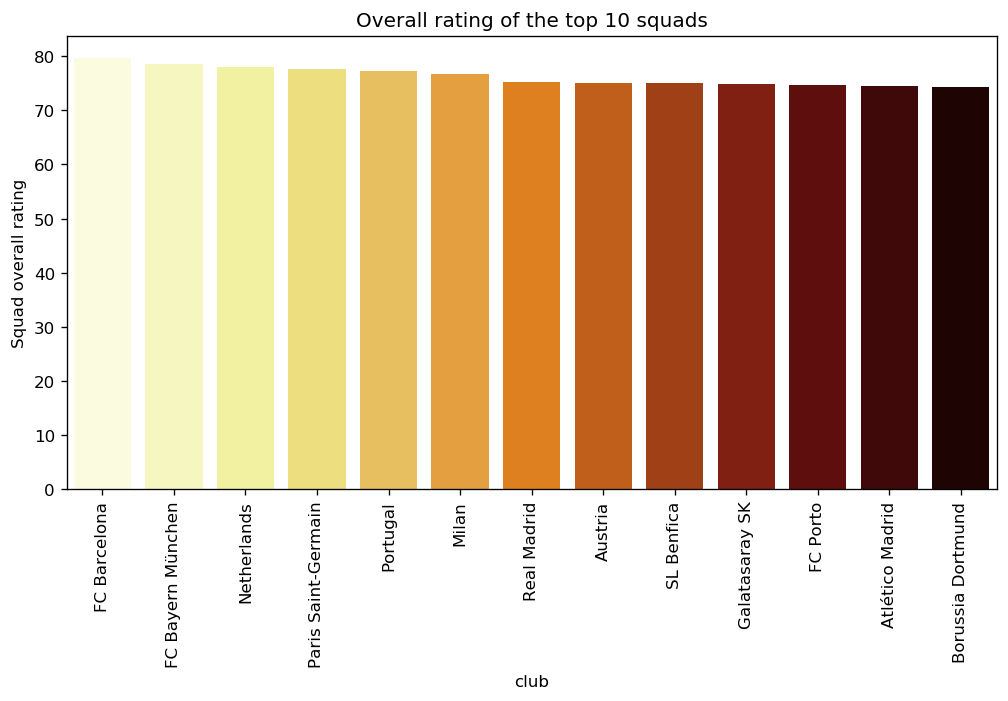

In [37]:
plt.figure(figsize=(10,5),dpi=120)
sns.barplot(x='club',y='overall',data=df,palette='afmhot_r')
plt.xticks(rotation=90)
plt.ylabel('Squad overall rating')
plt.title('Overall rating of the top 10 squads')

Correlation Heatmap between features

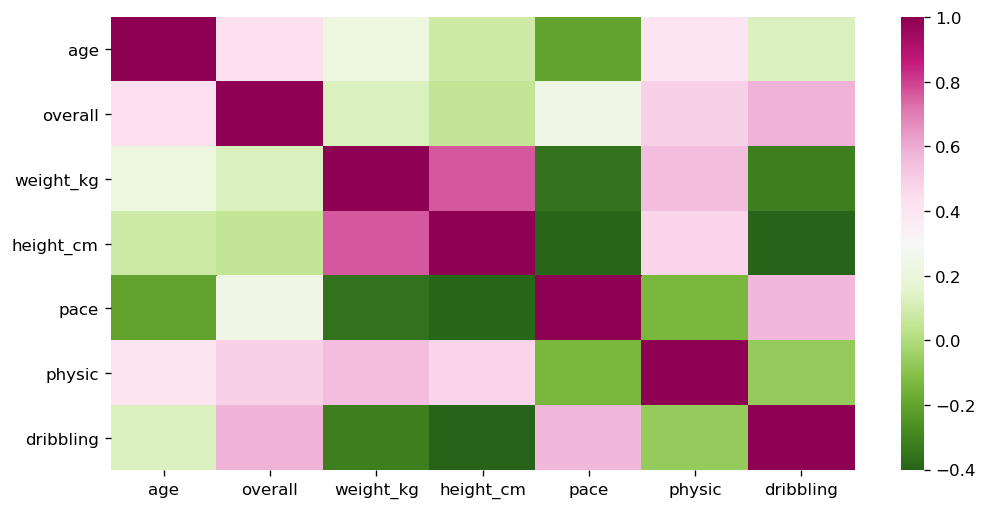

In [38]:
plt.figure(figsize=(10,5),dpi=120)
sns.heatmap(fifa_15[['age','overall','weight_kg','height_cm','pace','physic','dribbling']].corr(),cmap='PiYG_r')

**Creating a dataframe for each position**

In [39]:
# Striker
df_st=fifa_15[fifa_15['player_positions']=='ST']

# Center Forward
df_cf=fifa_15[fifa_15['player_positions']=='CF']

#CAM
df_cam=fifa_15[fifa_15['player_positions']=='CAM']

#LW
df_lw=fifa_15[fifa_15['player_positions']=='LW']

# RW
df_rw=fifa_15[fifa_15['player_positions']=='RW']

# LM
df_lm=fifa_15[fifa_15['player_positions']=='LM']

# RM
df_rm=fifa_15[fifa_15['player_positions']=='RM']

# CM
df_cm=fifa_15[fifa_15['player_positions']=='CM']

# CDM
df_cdm=fifa_15[fifa_15['player_positions']=='CDM']

# LB
df_lb=fifa_15[fifa_15['player_positions']=='LB']

# RB
df_rb=fifa_15[fifa_15['player_positions']=='RB']

#RWB
df_rwb=fifa_15[fifa_15['player_positions']=='RWB']

#LWB
df_lwb=fifa_15[fifa_15['player_positions']=='LWB']

#CB
df_cb=fifa_15[fifa_15['player_positions']=='CB']

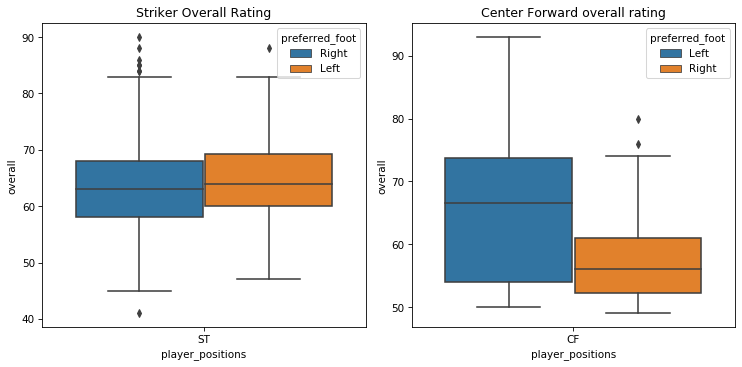

In [40]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5),dpi=75)
sns.boxplot(df_st['player_positions'],df_st['overall'],hue=df_st['preferred_foot'],ax=ax1)
sns.boxplot(df_cf['player_positions'],df_cf['overall'],hue=df_cf['preferred_foot'],ax=ax2)
ax1.set_title('Striker Overall Rating')
ax2.set_title('Center Forward overall rating')
plt.tight_layout()

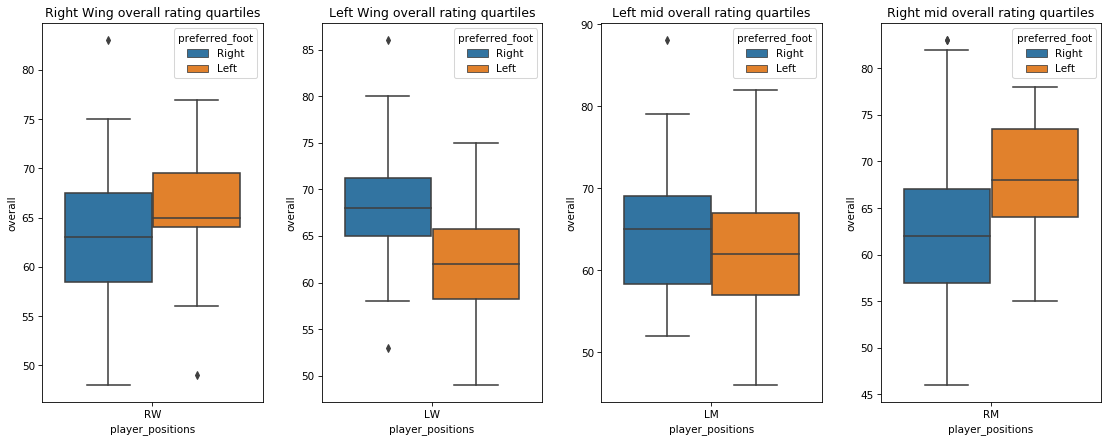

In [41]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(15,6),dpi=75)
sns.boxplot(x='player_positions',y='overall',data=df_rw,hue='preferred_foot',ax=ax1)
sns.boxplot(x='player_positions',y='overall',data=df_lw,hue='preferred_foot',ax=ax2)
sns.boxplot(x='player_positions',y='overall',data=df_lm,hue='preferred_foot',ax=ax3)
sns.boxplot(x='player_positions',y='overall',data=df_rm,hue='preferred_foot',ax=ax4)
ax1.set_title('Right Wing overall rating quartiles')
ax2.set_title('Left Wing overall rating quartiles')
ax3.set_title('Left mid overall rating quartiles')
ax4.set_title('Right mid overall rating quartiles')
plt.tight_layout()

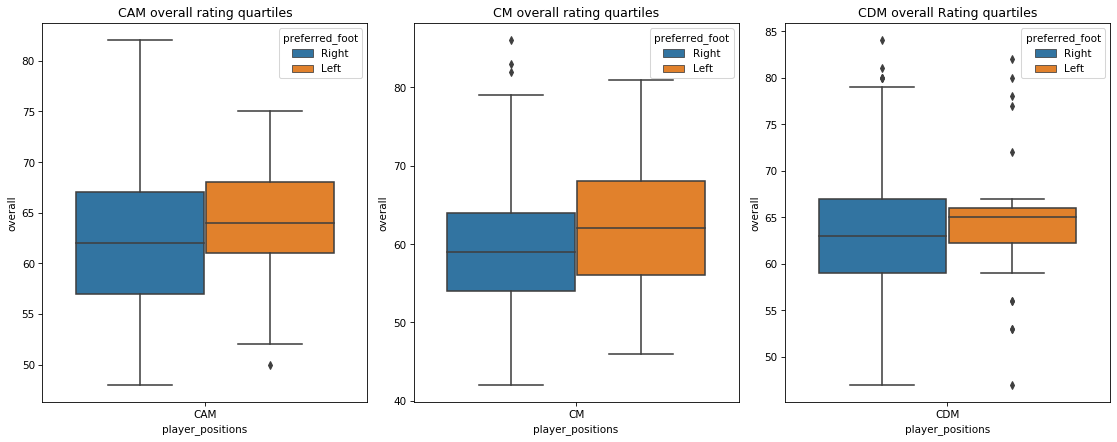

In [42]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,6),dpi=75)
sns.boxplot(x='player_positions',y='overall',data=df_cam,hue='preferred_foot',ax=ax1)
sns.boxplot(x='player_positions',y='overall',data=df_cm,hue='preferred_foot',ax=ax2)
sns.boxplot(x='player_positions',y='overall',data=df_cdm,hue='preferred_foot',ax=ax3)
ax1.set_title('CAM overall rating quartiles')
ax2.set_title('CM overall rating quartiles')
ax3.set_title('CDM overall Rating quartiles')
plt.tight_layout()

Text(0.5, 1.0, 'Right Back Overall quartiles')

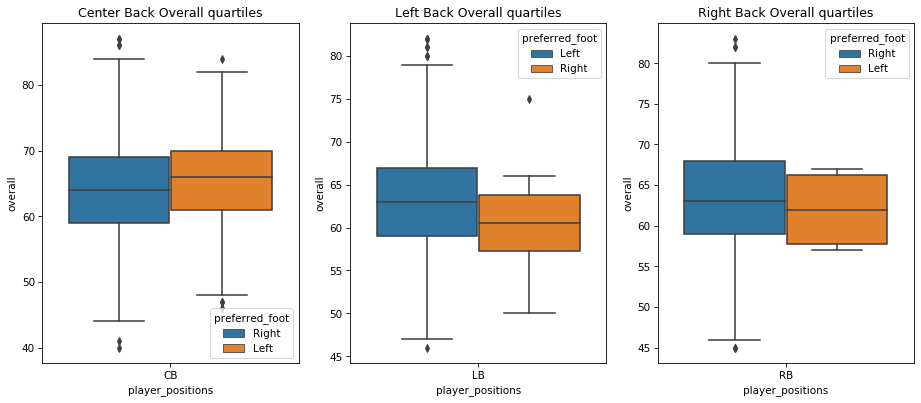

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15, 6),dpi=75)
sns.boxplot(x='player_positions',y='overall',data=df_cb,hue='preferred_foot', ax=ax1)
sns.boxplot(x='player_positions',y='overall',data=df_lb,hue='preferred_foot', ax=ax2)
sns.boxplot(x='player_positions',y='overall',data=df_rb,hue='preferred_foot', ax=ax3)
ax1.set_title('Center Back Overall quartiles')
ax2.set_title('Left Back Overall quartiles')
ax3.set_title('Right Back Overall quartiles')

Visualizing the distribution of dribbling rating amongst the attacking(CAM,CF and ST) and wide(LW,RW,RB,LB) positions 

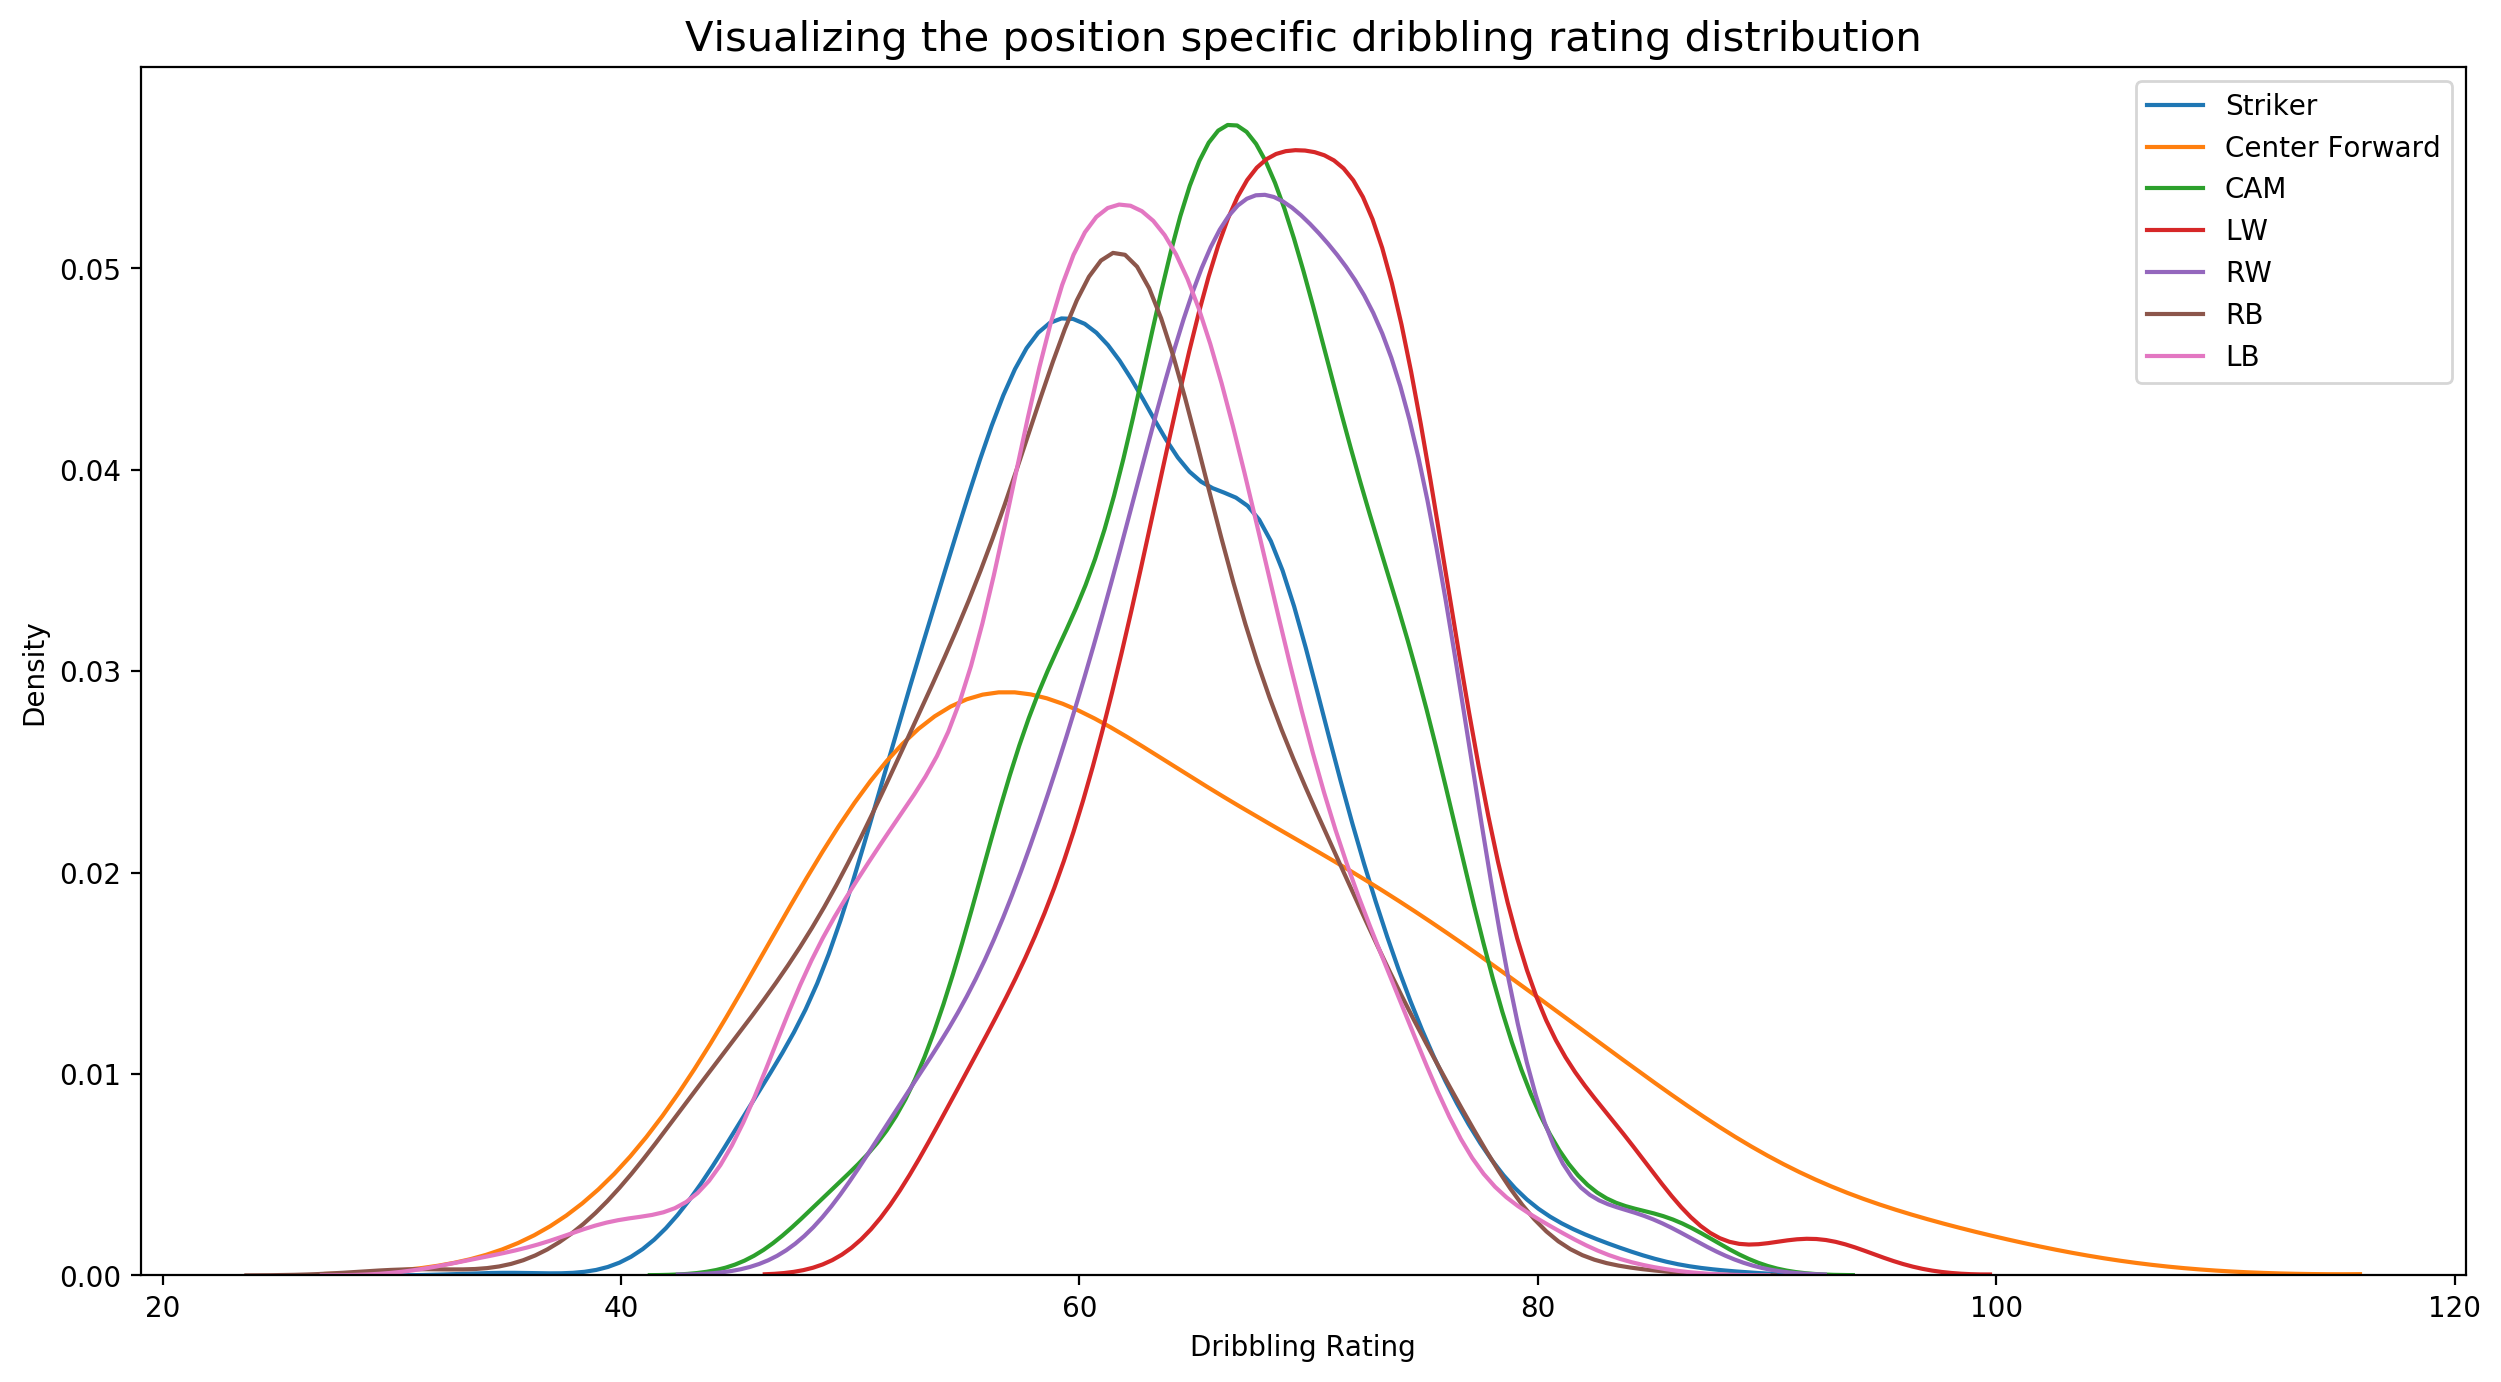

In [44]:
plt.figure(figsize=(15,8),dpi=200)
sns.distplot(df_st['dribbling'],label='Striker',hist=False)
sns.distplot(df_cf['dribbling'],label='Center Forward',hist=False)
sns.distplot(df_cam['dribbling'],label='CAM',hist=False)
sns.distplot(df_lw['dribbling'],label='LW',hist=False)
sns.distplot(df_rw['dribbling'],label='RW',hist=False)
sns.distplot(df_rb['dribbling'],label='RB',hist=False)
sns.distplot(df_lb['dribbling'],label='LB',hist=False)
plt.xlabel('Dribbling Rating')
plt.ylabel('Density')
plt.title('Visualizing the position specific dribbling rating distribution',fontsize=15)
plt.legend()

As expected, the wide attacking players i.e the LW,RW have the highest rating for dribbling as can be seen in the plot above.

Since defensive positions(CB,LB,RB and CDM) are expected to provide a phsyical presence at the back, the distribution of physicality rating for these positions is visualized below

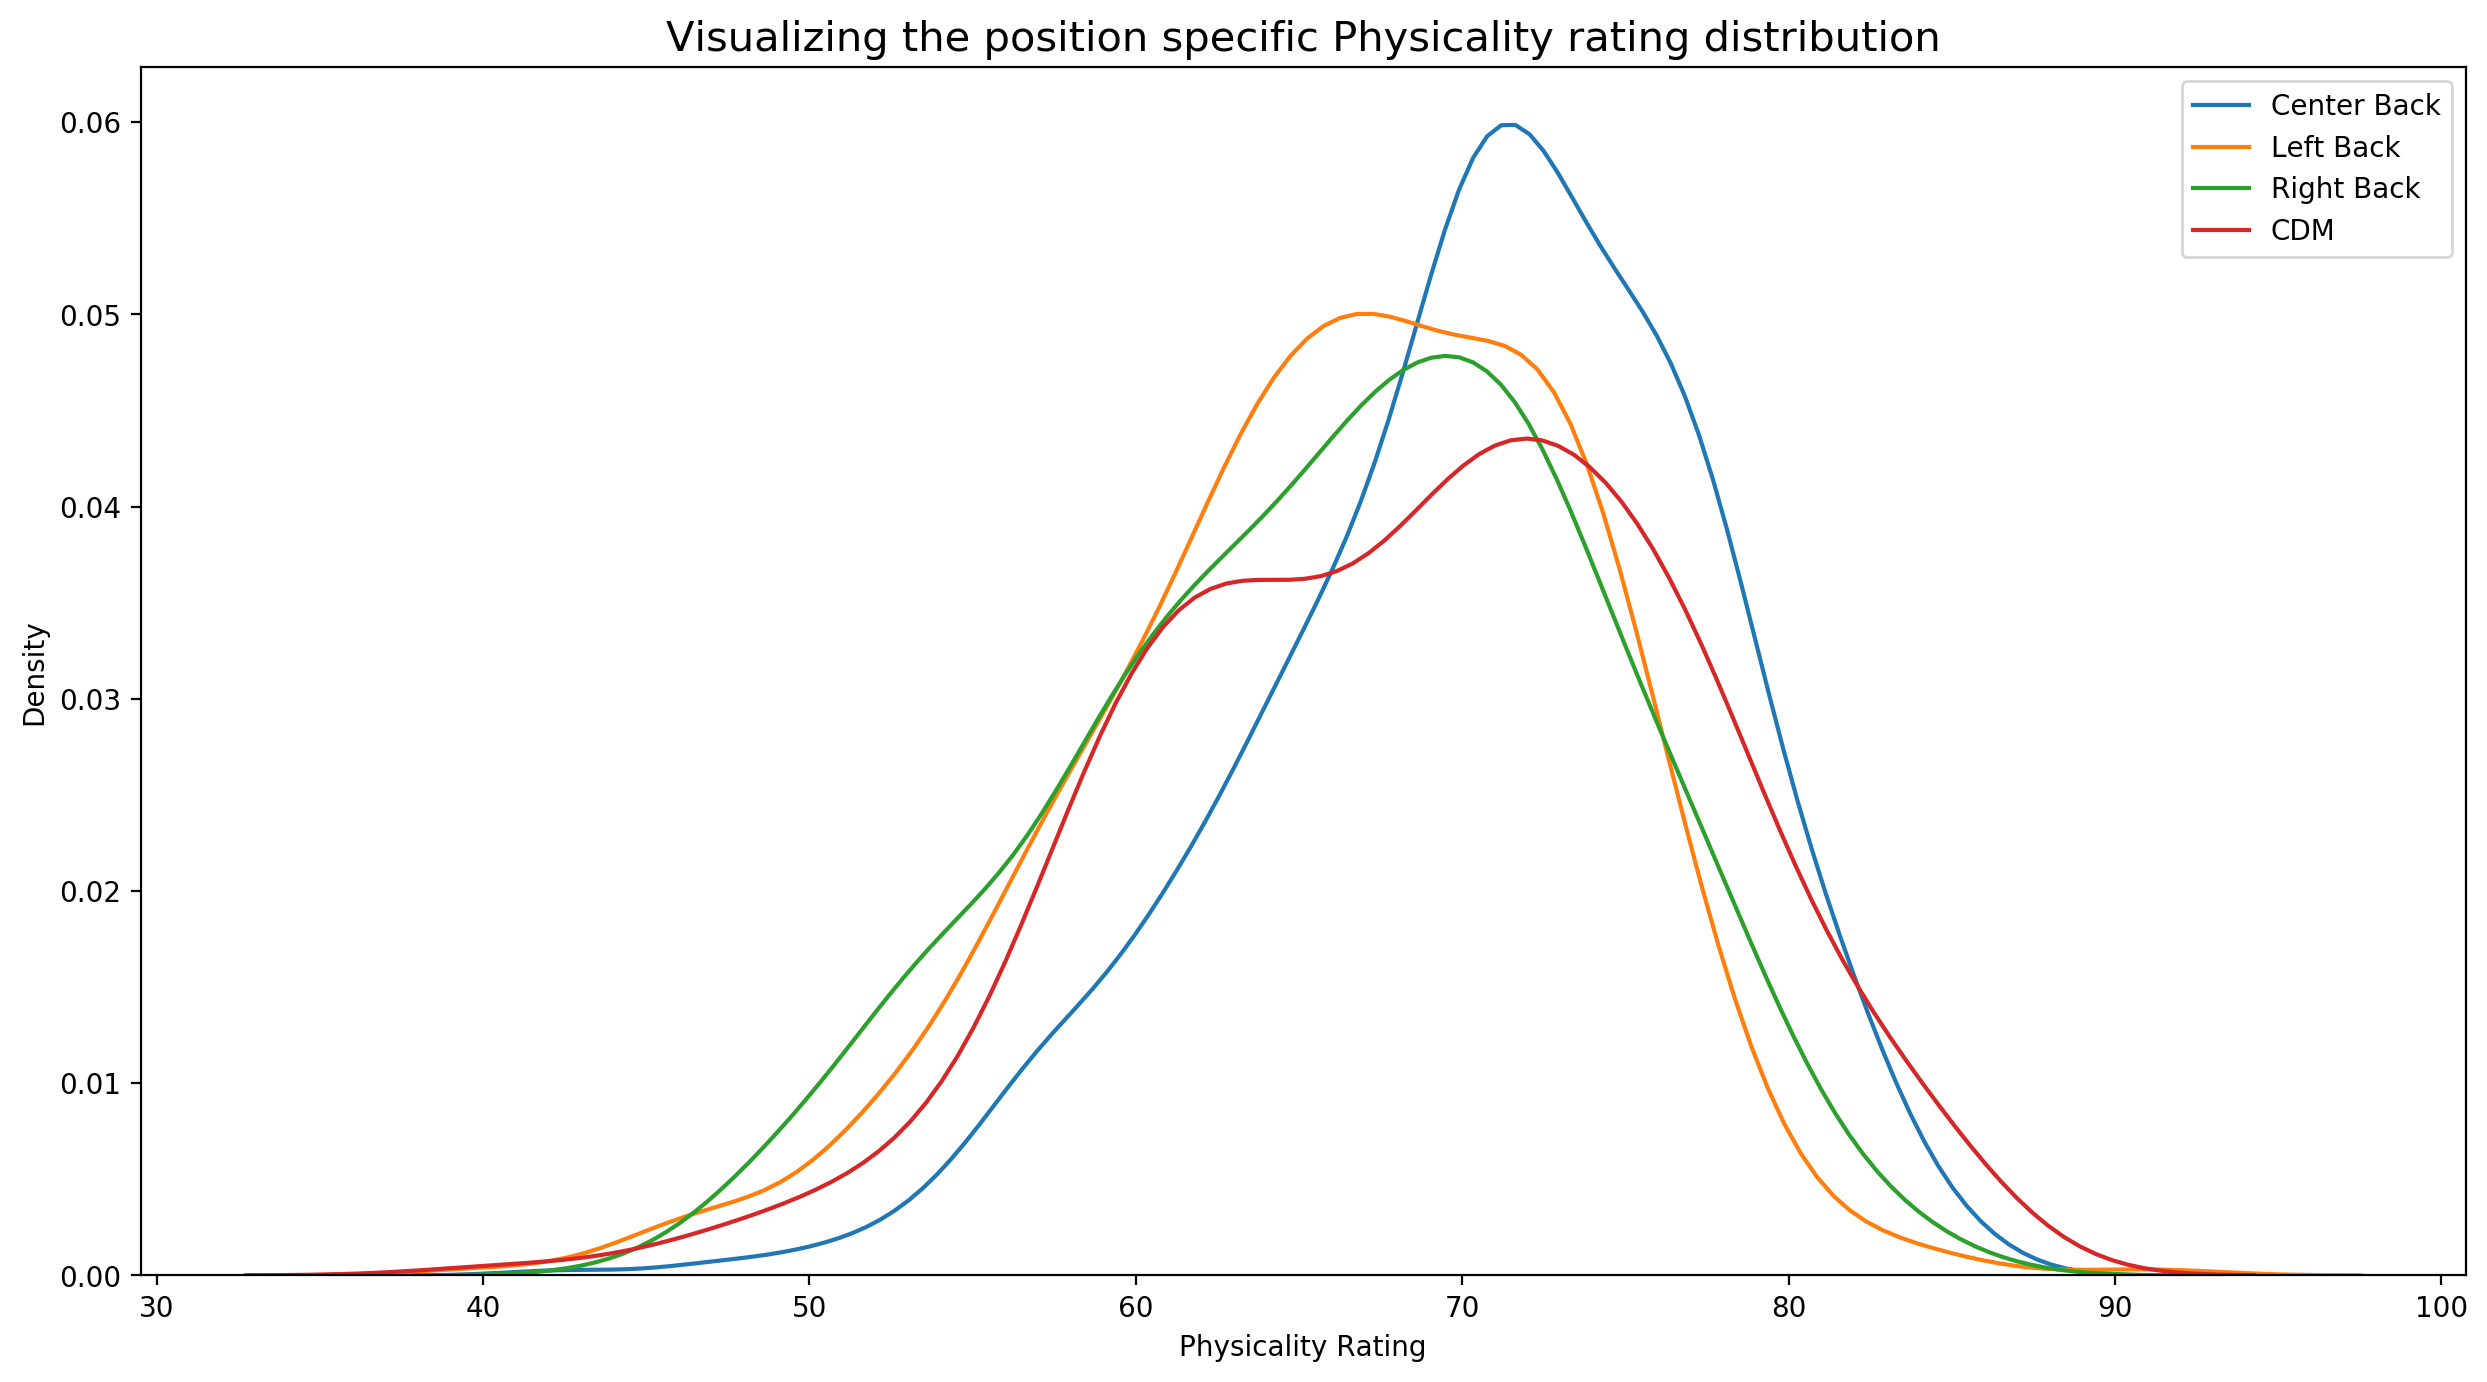

In [45]:
plt.figure(figsize=(15,8),dpi=200)
sns.distplot(df_cb['physic'],label='Center Back',hist=False)
sns.distplot(df_lb['physic'],label='Left Back',hist=False)
sns.distplot(df_rb['physic'],label='Right Back',hist=False)
sns.distplot(df_cdm['physic'],label='CDM',hist=False)
plt.xlabel('Physicality Rating')
plt.ylabel('Density')
plt.title('Visualizing the position specific Physicality rating distribution',fontsize=15)
plt.legend()

Visualising the defensive ratings for the Central defensive, central midfield and center back positions

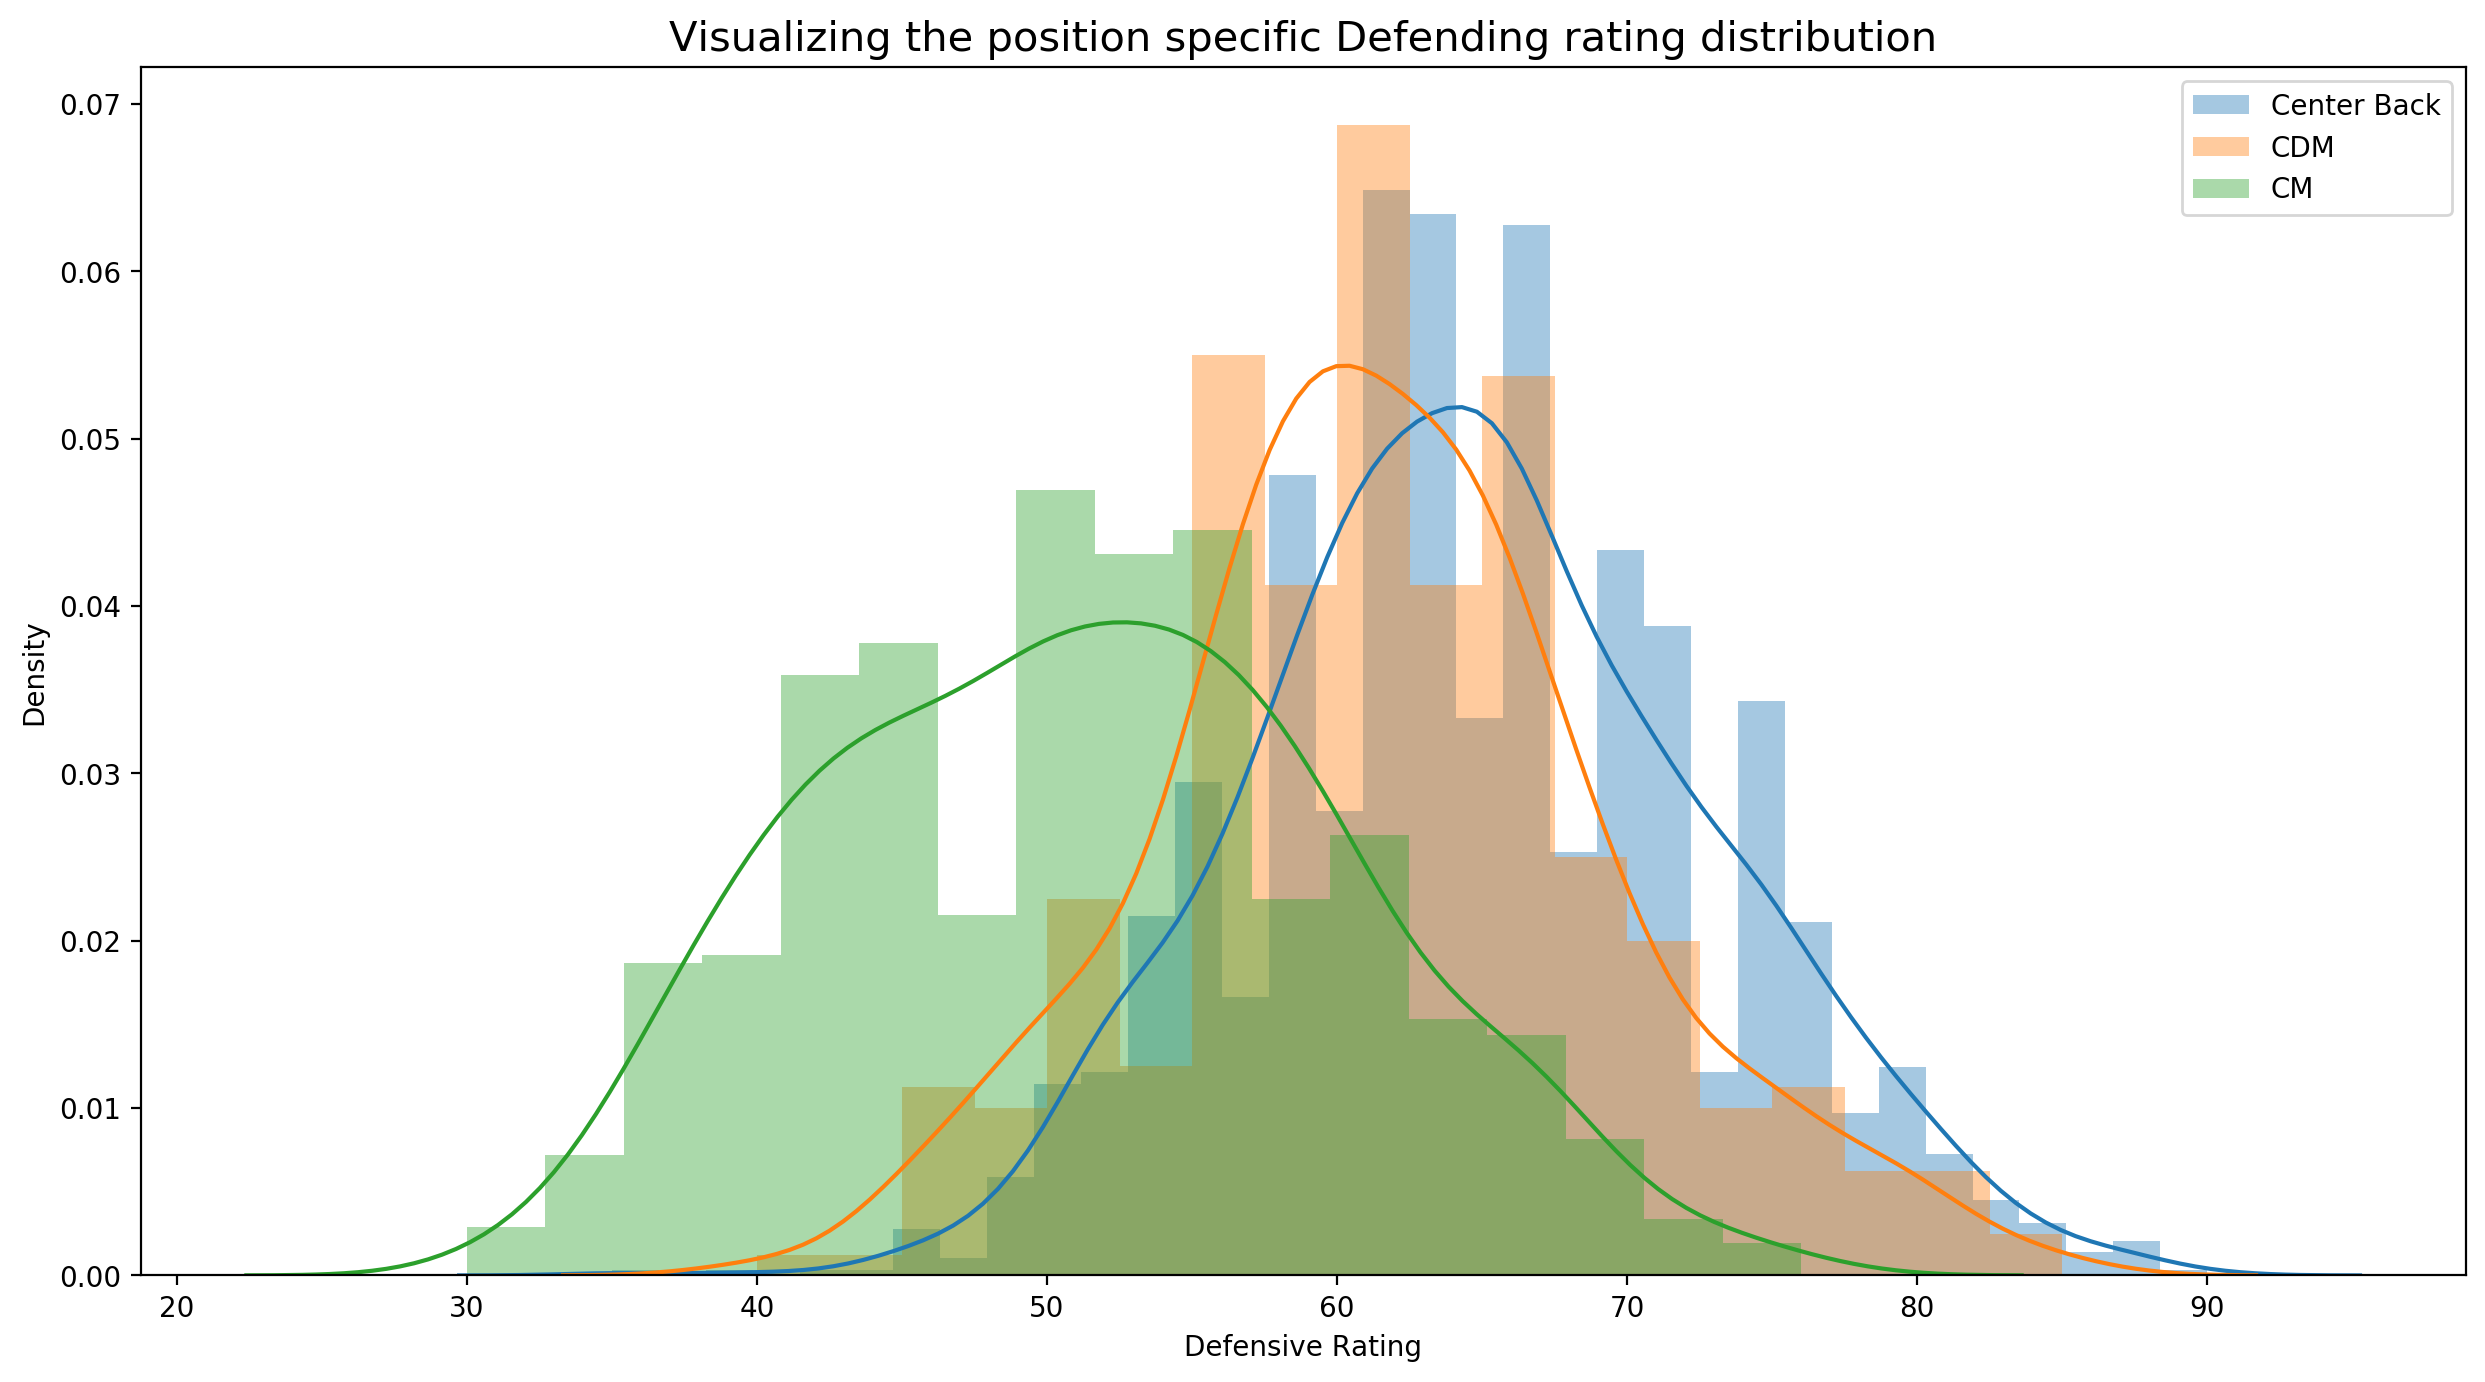

In [46]:
plt.figure(figsize=(15,8),dpi=200)
sns.distplot(df_cb['defending'],label='Center Back')
sns.distplot(df_cdm['defending'],label='CDM')
sns.distplot(df_cm['defending'],label='CM')
plt.xlabel('Defensive Rating')
plt.ylabel('Density')
plt.title('Visualizing the position specific Defending rating distribution',fontsize=15)
plt.legend()

Playmakers i.e CAM, CDM, CM and Center forwards are expected to have good passing abilities. The plot below enables us to visualize these

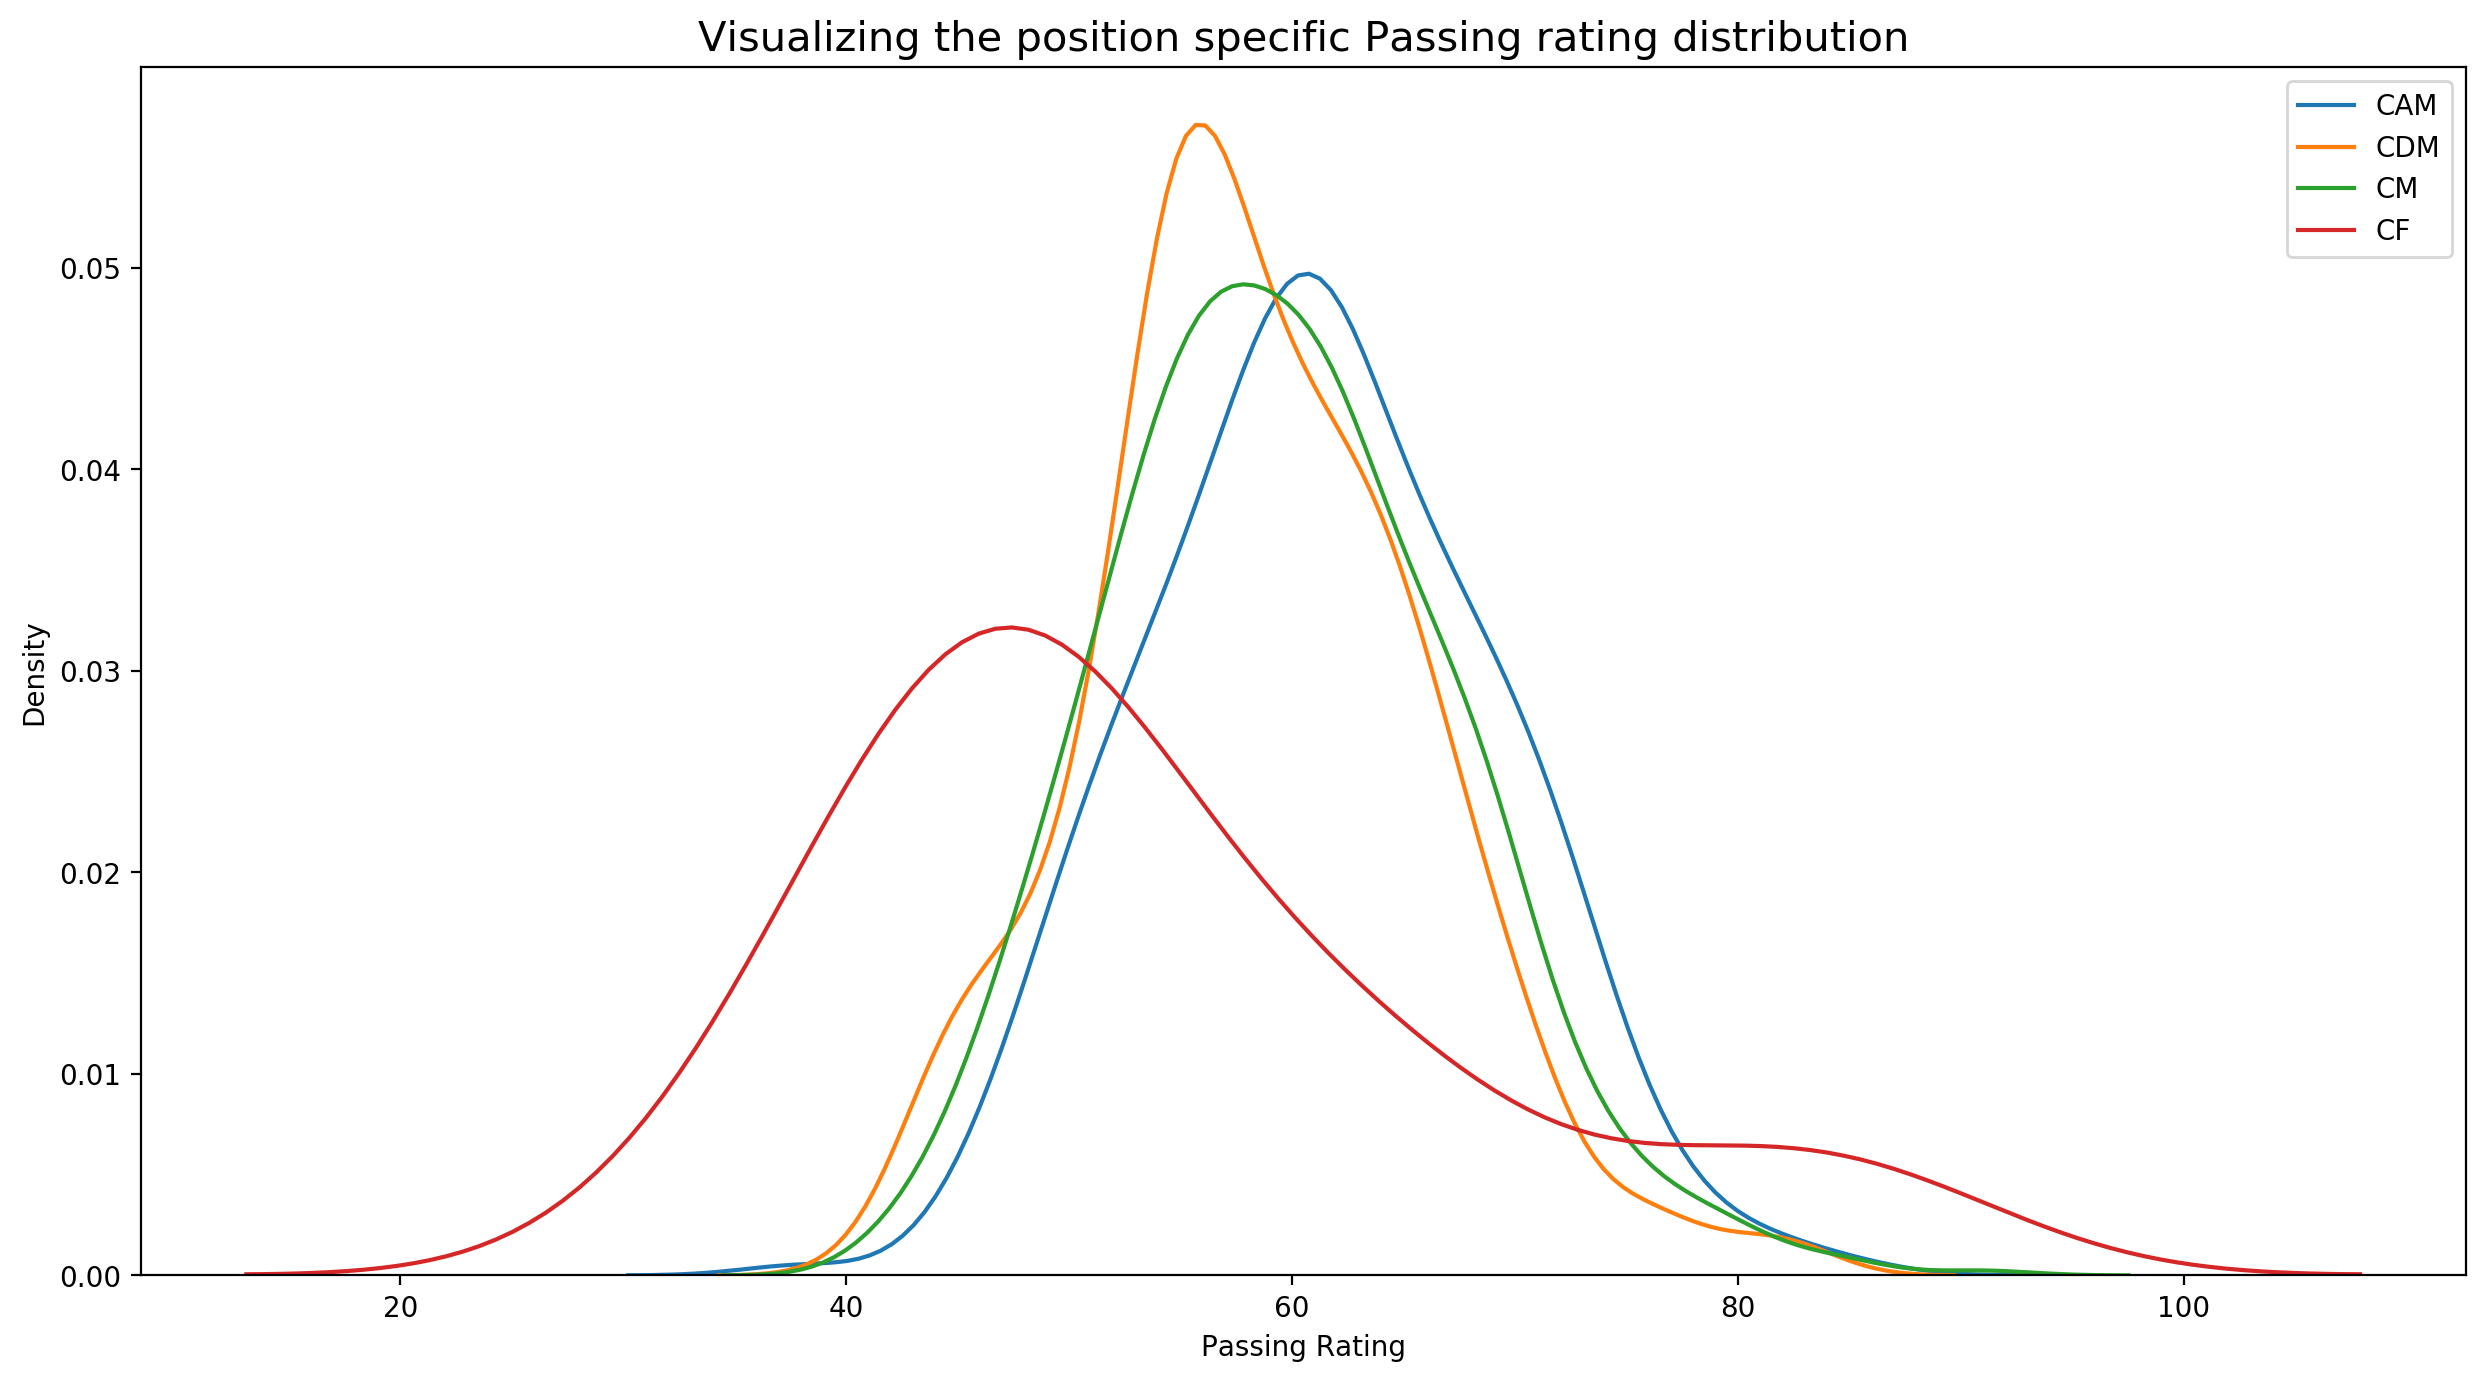

In [47]:
plt.figure(figsize=(15,8),dpi=200)
sns.distplot(df_cam['passing'],label='CAM',hist=False)
sns.distplot(df_cdm['passing'],label='CDM',hist=False)
sns.distplot(df_cm['passing'],label='CM',hist=False)
sns.distplot(df_cf['passing'],label='CF',hist=False)
plt.xlabel('Passing Rating')
plt.ylabel('Density')
plt.title('Visualizing the position specific Passing rating distribution',fontsize=15)
plt.legend()